<h1>Price Optimisation based on price elasticity of Demand</h1>
<p>Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.</p>

<p>Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.</p>

<p>Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is:  % CHANGE IN Q / % CHANGE IN P

In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?</p>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [5]:
#Display all the rows and columns
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<font size = "5" >LOAD THE DATA</font>

In [39]:
sold = pd.read_csv("simulated_sales_data.csv")
transactions = pd.read_csv("generated_transaction_data.csv")
date_info = pd.read_csv("date.csv")

In [6]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1000,3,1098,TEA
1,1001,0,9912,SMOOTHIE
2,1002,2,6249,LEMONADE
3,1003,0,3344,PIZZA
4,1004,0,3052,COFFEE


In [15]:
sold.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,2000.000000,2000.000000,2000.000000
mean,1999.500000,1.479500,5080.884500
std,577.494589,1.124817,2703.847258
min,1000.000000,0.000000,1098.000000
25%,1499.750000,0.000000,3052.000000
50%,1999.500000,1.000000,4021.000000
75%,2499.250000,2.000000,7788.000000
max,2999.000000,3.000000,9912.000000


In [16]:
#include the text/string data types 
sold.describe(include = ['O'])

,ITEM_NAME
count,2000
unique,10
top,SMOOTHIE
freq,216


In [17]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


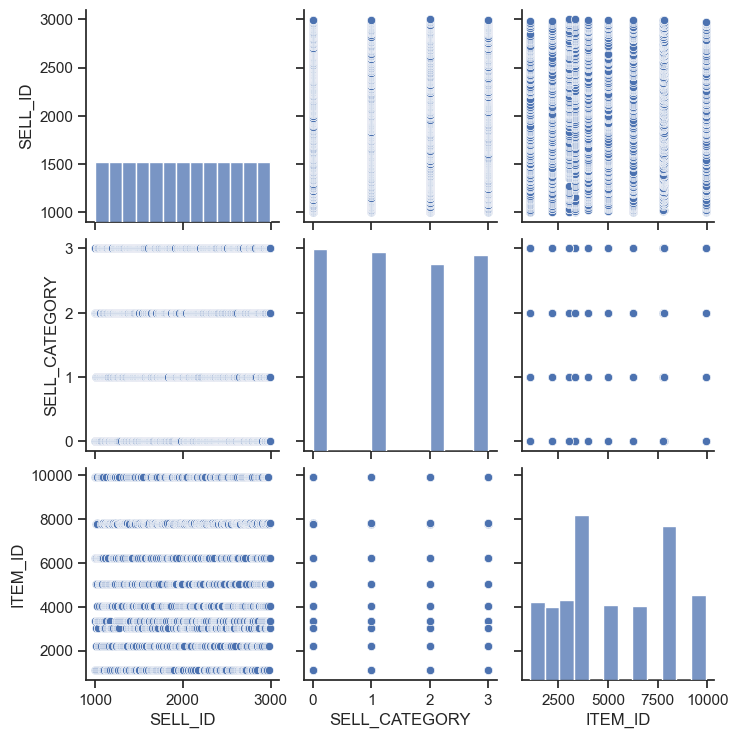

In [18]:
sns.pairplot(sold)

In [21]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,2012-01-01,12.41,27,2056,2
1,2012-01-01,15.59,20,1076,2
2,2012-01-01,12.55,47,1071,2
3,2012-01-01,13.00,50,2049,0
4,2012-01-01,15.58,73,1080,0


In [23]:
transactions.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,13.397520,37.269500,1786.59150,1.036000
std,1.278511,19.384859,436.35509,0.999602
min,11.970000,13.000000,1060.00000,0.000000
25%,12.490000,21.000000,1079.00000,0.000000
50%,12.900000,30.000000,2049.00000,2.000000
75%,13.380000,49.000000,2055.00000,2.000000
max,16.270000,75.000000,2063.00000,2.000000


In [24]:
transactions.describe(include = ['O'])

,CALENDAR_DATE
count,2000
unique,100
top,2012-03-02
freq,35


In [25]:
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([400., 501., 511.,  92.,   0.,   0.,  71., 134., 142., 149.]),
 array([11.97, 12.4 , 12.83, 13.26, 13.69, 14.12, 14.55, 14.98, 15.41,
        15.84, 16.27]),
 <BarContainer object of 10 artists>)

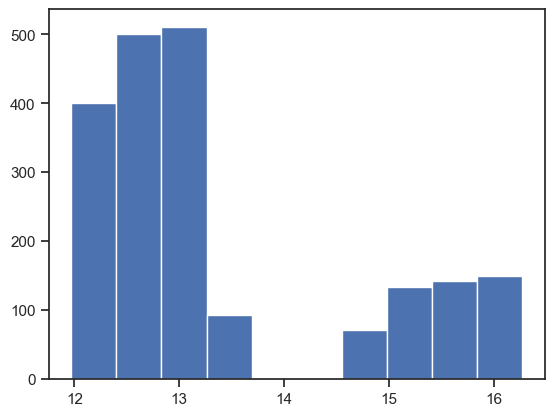

In [26]:
plt.hist(transactions.PRICE)

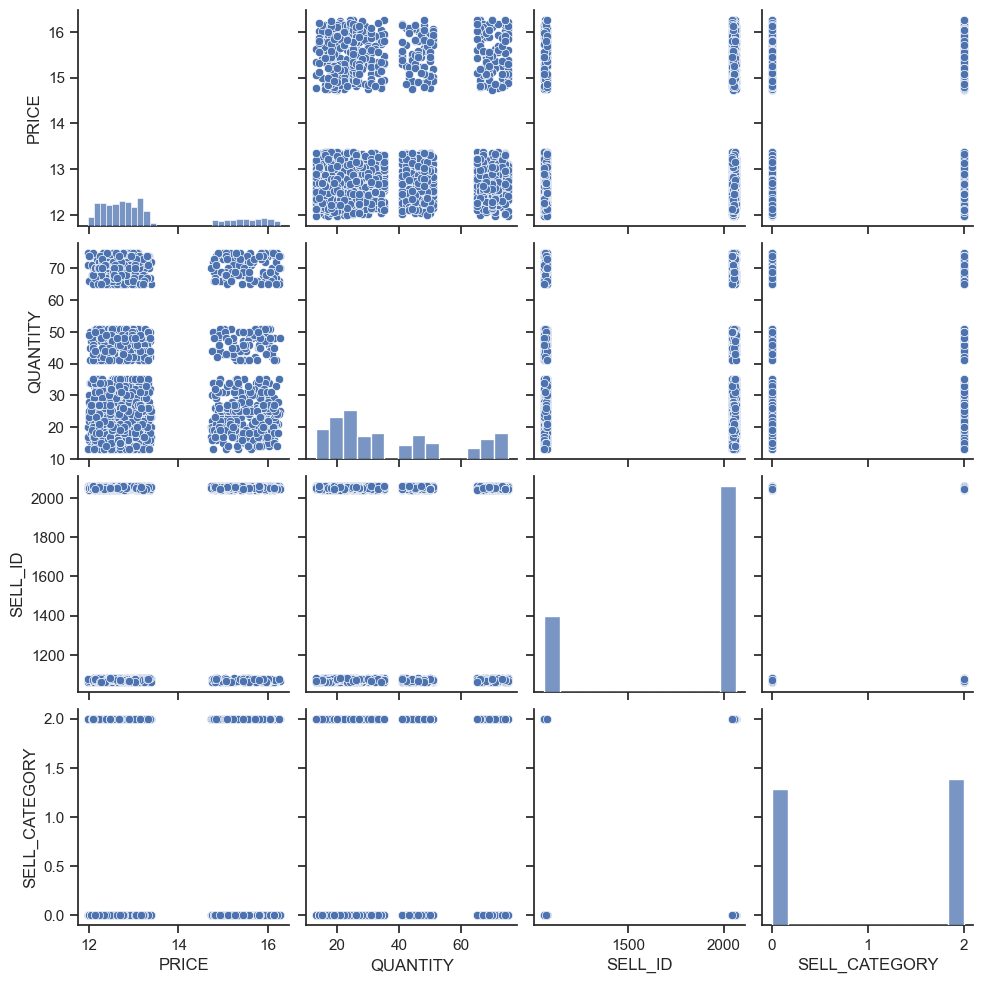

In [27]:
sns.pairplot(transactions)

In [29]:
date.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1000,3,1098,TEA
1,1001,0,9912,SMOOTHIE
2,1002,2,6249,LEMONADE
3,1003,0,3344,PIZZA
4,1004,0,3052,COFFEE


In [36]:
date_info.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,2000.000000,2000.000000,2000.000000
mean,1999.500000,1.479500,5080.884500
std,577.494589,1.124817,2703.847258
min,1000.000000,0.000000,1098.000000
25%,1499.750000,0.000000,3052.000000
50%,1999.500000,1.000000,4021.000000
75%,2499.250000,2.000000,7788.000000
max,2999.000000,3.000000,9912.000000


In [44]:
date_info.describe(include = ['O'])

,CALENDAR_DATE,HOLIDAY
count,2000,283
unique,2000,5
top,06/06/17,New Year
freq,1,85


In [41]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [42]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,01/01/12,2012,NaN,1,0,17.8,0
1,01/02/12,2012,NaN,0,0,16.0,0
2,01/03/12,2012,NaN,0,1,14.3,0
3,01/04/12,2012,NaN,0,0,16.6,0
4,01/05/12,2012,NaN,0,0,14.9,0
...,...,...,...,...,...,...,...
1993,06/16/17,2017,NaN,0,0,15.9,0
1994,06/17/17,2017,NaN,1,0,18.5,0
1995,06/18/17,2017,NaN,1,0,16.2,0
1996,06/19/17,2017,NaN,0,0,15.4,0


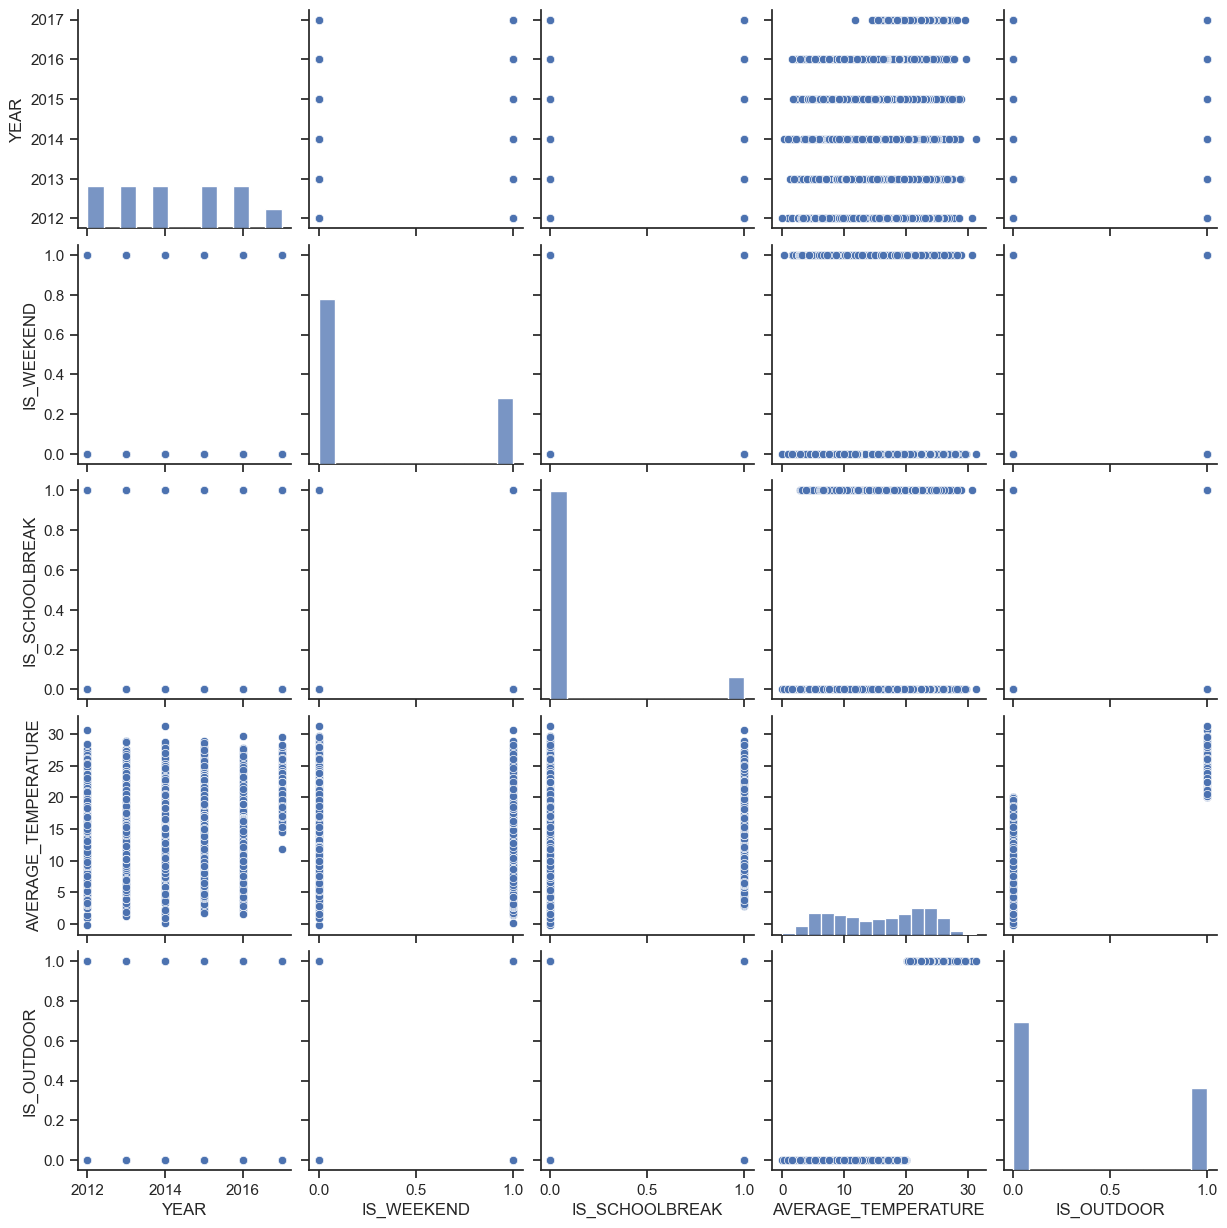

In [46]:
sns.pairplot(date_info)

<font size="5">Understanding The Data Better</font>

In [51]:
date_info['HOLIDAY'].unique()


array([nan, 'Christmas', 'New Year', 'Independence Day', 'Thanksgiving',
       'Labour Day'], dtype=object)

In [53]:
date_info['CALENDAR_DATE'].min()

'01/01/12'

In [54]:
date_info['CALENDAR_DATE'].max()

'12/31/16'

In [55]:
date_info.shape

(2000, 7)

In [56]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,01/01/12,2012,NaN,1,0,17.8,0
1,01/02/12,2012,NaN,0,0,16.0,0
2,01/03/12,2012,NaN,0,1,14.3,0
3,01/04/12,2012,NaN,0,0,16.6,0
4,01/05/12,2012,NaN,0,0,14.9,0
...,...,...,...,...,...,...,...
1993,06/16/17,2017,NaN,0,0,15.9,0
1994,06/17/17,2017,NaN,1,0,18.5,0
1995,06/18/17,2017,NaN,1,0,16.2,0
1996,06/19/17,2017,NaN,0,0,15.4,0


In [57]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,DONUT,FRIES,LEMONADE,PIZZA,SANDWICH,SMOOTHIE,TEA
0,1000,False,False,False,False,False,False,False,False,False,True
1,1001,False,False,False,False,False,False,False,False,True,False
2,1002,False,False,False,False,False,True,False,False,False,False
3,1003,False,False,False,False,False,False,True,False,False,False
4,1004,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,2995,False,False,False,False,False,True,False,False,False,False
1996,2996,False,False,False,False,False,False,True,False,False,False
1997,2997,False,False,True,False,False,False,False,False,False,False
1998,2998,False,True,False,False,False,False,False,False,False,False


In [58]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,DONUT,FRIES,LEMONADE,PIZZA,SANDWICH,SMOOTHIE,TEA
SELL_ID,,,,,,,,,,,
1000,1000,0,0,0,0,0,0,0,0,0,1
1001,1001,0,0,0,0,0,0,0,0,1,0
1002,1002,0,0,0,0,0,1,0,0,0,0
1003,1003,0,0,0,0,0,0,1,0,0,0
1004,1004,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,0,0,0,0,0,1,0,0,0,0
2996,2996,0,0,0,0,0,0,1,0,0,0
2997,2997,0,0,1,0,0,0,0,0,0,0


In [59]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [61]:
data1.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1060,1,LEMONADE,2012-01-13,12.01,24
1,1060,1,LEMONADE,2012-01-25,15.10,23
2,1060,1,LEMONADE,2012-01-30,12.05,14
3,1060,1,LEMONADE,2012-02-14,12.77,32
4,1060,1,LEMONADE,2012-02-16,12.23,25
5,1060,1,LEMONADE,2012-02-18,13.00,14
6,1060,1,LEMONADE,2012-02-19,16.14,48
7,1060,1,LEMONADE,2012-02-20,12.56,18
8,1060,1,LEMONADE,2012-02-26,12.63,20
9,1060,1,LEMONADE,2012-02-26,13.23,15


In [62]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1060     1              LEMONADE   2012-01-13     12.01    24
                                   2012-01-25     15.10    23
                                   2012-01-30     12.05    14
                                   2012-02-14     12.77    32
                                   2012-02-16     12.23    25
                                                           ..
2063     3              FRIES      2012-03-17     15.27    25
                                   2012-03-29     12.15    18
                                   2012-04-02     13.04    27
                                   2012-04-07     12.79    32
                                   2012-04-08     12.67    41
Name: QUANTITY, Length: 1998, dtype: int64

In [63]:
data1.shape
intermediate_data = b.reset_index()

In [64]:
data1.shape

(2000, 6)

In [65]:
b.shape

(1998,)

In [66]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1060,1,LEMONADE,2012-01-13,12.01,24
1,1060,1,LEMONADE,2012-01-25,15.10,23
2,1060,1,LEMONADE,2012-01-30,12.05,14
3,1060,1,LEMONADE,2012-02-14,12.77,32
4,1060,1,LEMONADE,2012-02-16,12.23,25


In [68]:
intermediate_data['CALENDAR_DATE'].min()

'2012-01-01'

In [69]:
intermediate_data['CALENDAR_DATE'].max()

'2012-04-09'

In [74]:
date_info['CALENDAR_DATE'] = pd.to_datetime(date_info['CALENDAR_DATE'], format='%m/%d/%y')

In [75]:
intermediate_data['CALENDAR_DATE'] = pd.to_datetime(intermediate_data['CALENDAR_DATE'])

In [76]:
combined_data = pd.merge(intermediate_data, date_info, on='CALENDAR_DATE', how='inner')
print(f"Combined data shape: {combined_data.shape}")
combined_data.head()

Combined data shape: (1998, 12)


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1060,1,LEMONADE,2012-01-13,12.01,24,2012,NaN,0,1,15.3,0
1,1060,1,LEMONADE,2012-01-25,15.10,23,2012,NaN,0,0,17.0,0
2,1060,1,LEMONADE,2012-01-30,12.05,14,2012,Christmas,0,0,21.7,1
3,1060,1,LEMONADE,2012-02-14,12.77,32,2012,NaN,0,0,22.4,1
4,1060,1,LEMONADE,2012-02-16,12.23,25,2012,NaN,0,0,20.3,1


In [77]:
combined_data.shape

(1998, 12)

In [78]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1060,1,LEMONADE,2012-01-13,12.01,24,2012,NaN,0,1,15.3,0
1,1060,1,LEMONADE,2012-01-25,15.10,23,2012,NaN,0,0,17.0,0
3,1060,1,LEMONADE,2012-02-14,12.77,32,2012,NaN,0,0,22.4,1
4,1060,1,LEMONADE,2012-02-16,12.23,25,2012,NaN,0,0,20.3,1
5,1060,1,LEMONADE,2012-02-18,13.00,14,2012,NaN,1,0,20.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2063,3,FRIES,2012-03-12,13.23,35,2012,NaN,0,0,24.4,1
1993,2063,3,FRIES,2012-03-17,15.27,25,2012,NaN,1,0,22.1,1
1994,2063,3,FRIES,2012-03-29,12.15,18,2012,NaN,0,0,25.9,1
1995,2063,3,FRIES,2012-04-02,13.04,27,2012,NaN,0,0,26.2,1


In [80]:
combined_data['HOLIDAY'].unique()
combined_data['IS_WEEKEND'].unique()
combined_data['IS_SCHOOLBREAK'].unique()

array([1, 0])

In [83]:
# Fill NaN values in HOLIDAY column with 'No Holiday'
combined_data['HOLIDAY'] = combined_data['HOLIDAY'].fillna('No Holiday')

In [84]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [85]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [86]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,1060,1,LEMONADE,2012-01-25,15.10,23,2012,No Holiday,0,0,17.0,0
3,1060,1,LEMONADE,2012-02-14,12.77,32,2012,No Holiday,0,0,22.4,1
4,1060,1,LEMONADE,2012-02-16,12.23,25,2012,No Holiday,0,0,20.3,1
7,1060,1,LEMONADE,2012-02-20,12.56,18,2012,No Holiday,0,0,24.5,1
11,1060,1,LEMONADE,2012-03-12,12.60,67,2012,No Holiday,0,0,24.4,1


In [87]:
bau_data.shape

(1133, 12)

In [89]:
np.unique(bau_data['HOLIDAY'])

array(['No Holiday'], dtype=object)

In [90]:
np.unique(bau_data['IS_WEEKEND'])

array([0])

In [91]:
np.unique(bau_data['IS_SCHOOLBREAK'])

array([0])

In [92]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [93]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'LEMONADE'),
  Text(1, 0, 'TEA'),
  Text(2, 0, 'SMOOTHIE'),
  Text(3, 0, 'DONUT'),
  Text(4, 0, 'COKE'),
  Text(5, 0, 'PIZZA'),
  Text(6, 0, 'SANDWICH'),
  Text(7, 0, 'FRIES'),
  Text(8, 0, 'COFFEE'),
  Text(9, 0, 'BURGER')])

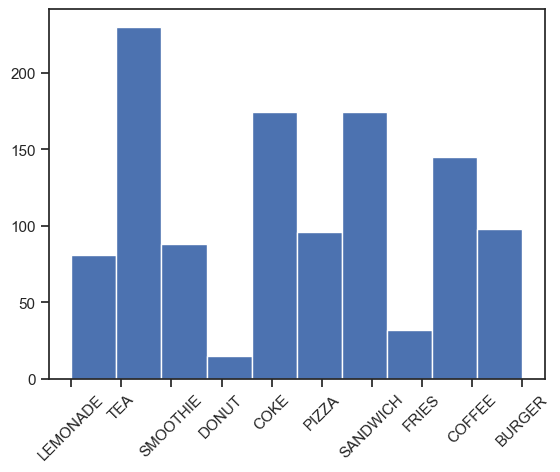

In [103]:
histo  = plt.hist(bau_data.ITEM_NAME)
plt.xticks(rotation=45)

(array([234., 264., 291.,  57.,   0.,   0.,  40.,  79.,  87.,  81.]),
 array([11.97, 12.4 , 12.83, 13.26, 13.69, 14.12, 14.55, 14.98, 15.41,
        15.84, 16.27]),
 <BarContainer object of 10 artists>)

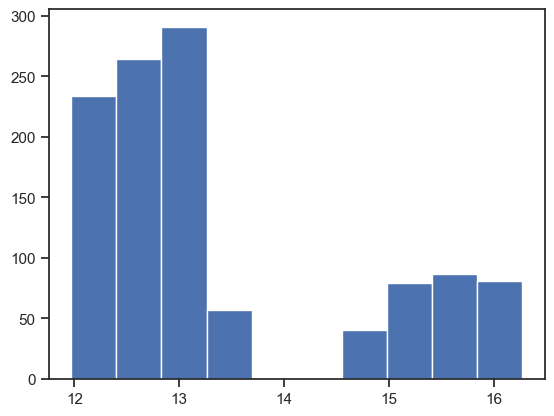

In [104]:
plt.hist(bau_data.PRICE)

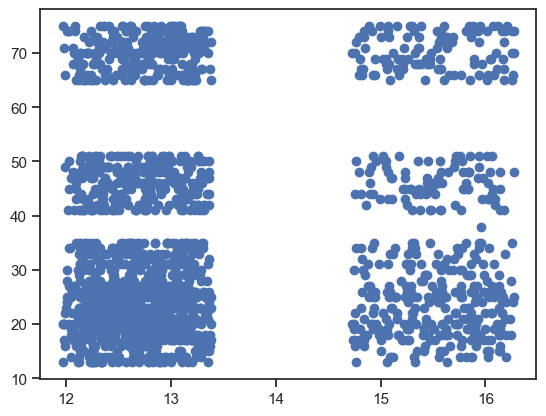

In [105]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

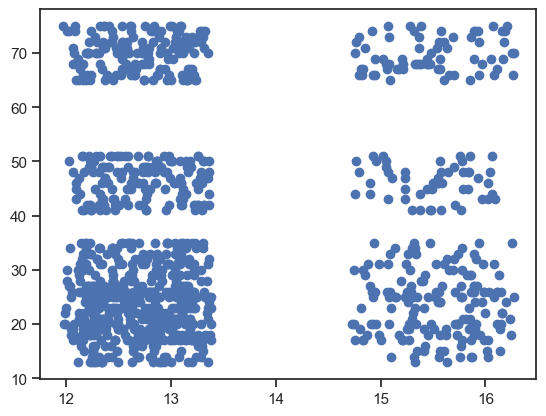

In [106]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

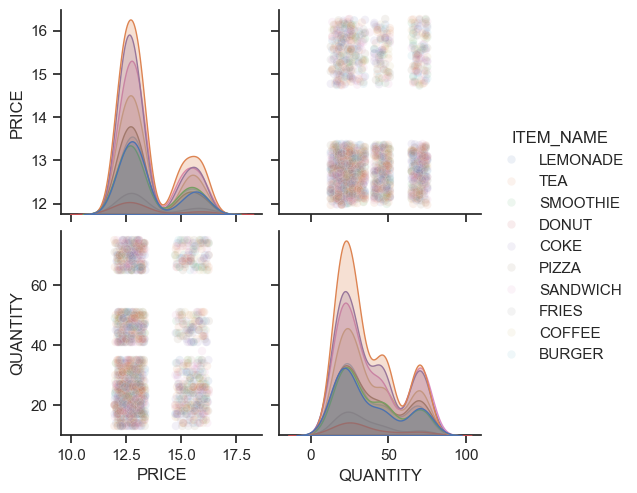

In [107]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

In [110]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
567,2042,3,BURGER,2012-01-03,12.51,71,2012,No Holiday,0,1,14.3,0
568,2042,3,BURGER,2012-01-08,16.05,43,2012,No Holiday,1,0,12.9,0
569,2042,3,BURGER,2012-01-12,15.79,45,2012,No Holiday,0,0,16.2,0
570,2042,3,BURGER,2012-01-17,12.81,74,2012,No Holiday,0,0,15.9,0
571,2042,3,BURGER,2012-01-17,13.22,66,2012,No Holiday,0,0,15.9,0


In [111]:
burger.shape


(163, 12)

In [112]:
burger.describe()


,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,163.000000,163.000000,163,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000
mean,2050.662577,1.797546,2012-02-19 22:22:49.325153280,13.459387,37.319018,2012.0,0.239264,0.073620,21.682209,0.693252
min,2042.000000,1.000000,2012-01-01 00:00:00,12.000000,13.000000,2012.0,0.000000,0.000000,12.900000,0.000000
25%,2042.000000,1.000000,2012-01-28 00:00:00,12.550000,22.000000,2012.0,0.000000,0.000000,17.900000,0.000000
50%,2049.000000,2.000000,2012-02-21 00:00:00,13.010000,30.000000,2012.0,0.000000,0.000000,22.500000,1.000000
75%,2062.000000,3.000000,2012-03-12 12:00:00,14.800000,49.500000,2012.0,0.000000,0.000000,25.100000,1.000000
max,2062.000000,3.000000,2012-04-07 00:00:00,16.080000,75.000000,2012.0,1.000000,1.000000,27.100000,1.000000
std,7.491741,0.832663,NaN,1.262577,19.165203,0.0,0.427949,0.261956,3.816192,0.462565


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

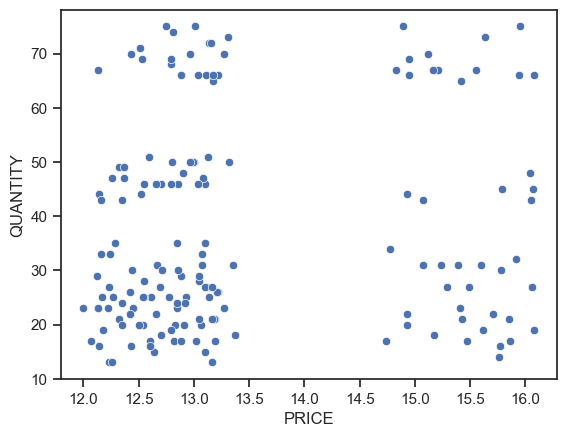

In [113]:
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

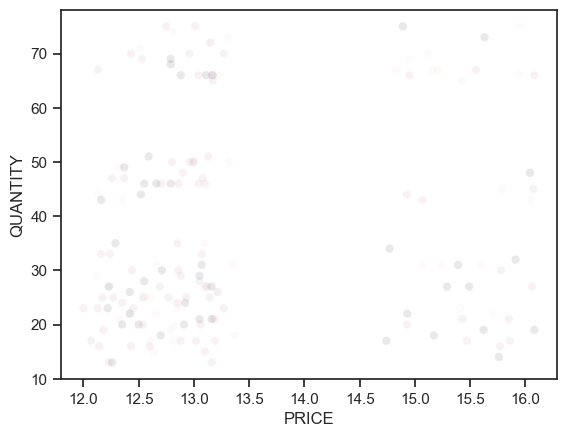

In [114]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [115]:
np.unique(combined_data.SELL_ID)

array([1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070,
       1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
       2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063])

In [116]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 1, 2, 3])

In [125]:
# Get unique SELL_IDs where ITEM_NAME is 'BURGER'
burger_sell_ids = combined_data[combined_data['ITEM_NAME'] == 'BURGER']['SELL_ID'].unique()
print("SELL_IDs selling BURGER:", burger_sell_ids)

SELL_IDs selling BURGER: [2042 2049 2062]


In [127]:
burger_2042 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2042)]

burger_2042.head()


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
567,2042,3,BURGER,2012-01-03,12.51,71,2012,No Holiday,0,1,14.3,0
568,2042,3,BURGER,2012-01-08,16.05,43,2012,No Holiday,1,0,12.9,0
569,2042,3,BURGER,2012-01-12,15.79,45,2012,No Holiday,0,0,16.2,0
570,2042,3,BURGER,2012-01-17,12.81,74,2012,No Holiday,0,0,15.9,0
571,2042,3,BURGER,2012-01-17,13.22,66,2012,No Holiday,0,0,15.9,0


In [128]:
burger_2042.describe()


,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,43.0,43.0,43,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000
mean,2042.0,3.0,2012-02-24 00:33:29.302325504,13.695581,40.883721,2012.0,0.232558,0.023256,22.167442,0.790698
min,2042.0,3.0,2012-01-03 00:00:00,12.120000,15.000000,2012.0,0.000000,0.000000,12.900000,0.000000
25%,2042.0,3.0,2012-02-06 12:00:00,12.625000,22.500000,2012.0,0.000000,0.000000,20.600000,1.000000
50%,2042.0,3.0,2012-02-29 00:00:00,13.190000,31.000000,2012.0,0.000000,0.000000,22.500000,1.000000
75%,2042.0,3.0,2012-03-13 00:00:00,15.140000,66.000000,2012.0,0.000000,0.000000,25.150000,1.000000
max,2042.0,3.0,2012-04-07 00:00:00,16.050000,75.000000,2012.0,1.000000,1.000000,27.100000,1.000000
std,0.0,0.0,NaN,1.341448,20.823761,0.0,0.427463,0.152499,3.596210,0.411625


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

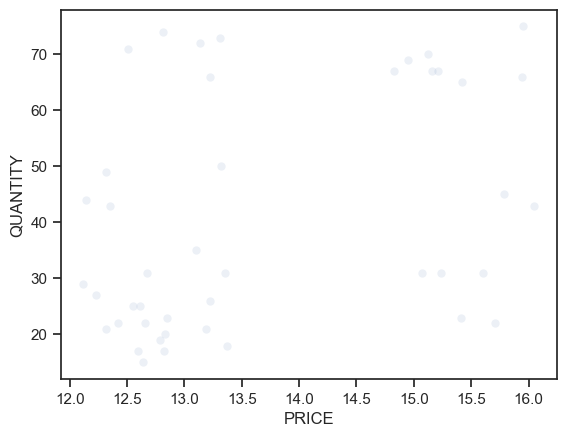

In [129]:
sns.scatterplot(data = burger_2042, x = burger_2042.PRICE, y = burger_2042.QUANTITY, alpha = 0.1)

<font size="8"> Modeling </font>

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     6.778
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0128
Time:                        13:17:58   Log-Likelihood:                -187.77
No. Observations:                  43   AIC:                             379.5
Df Residuals:                      41   BIC:                             383.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.1929     30.901     -1.268      0.2

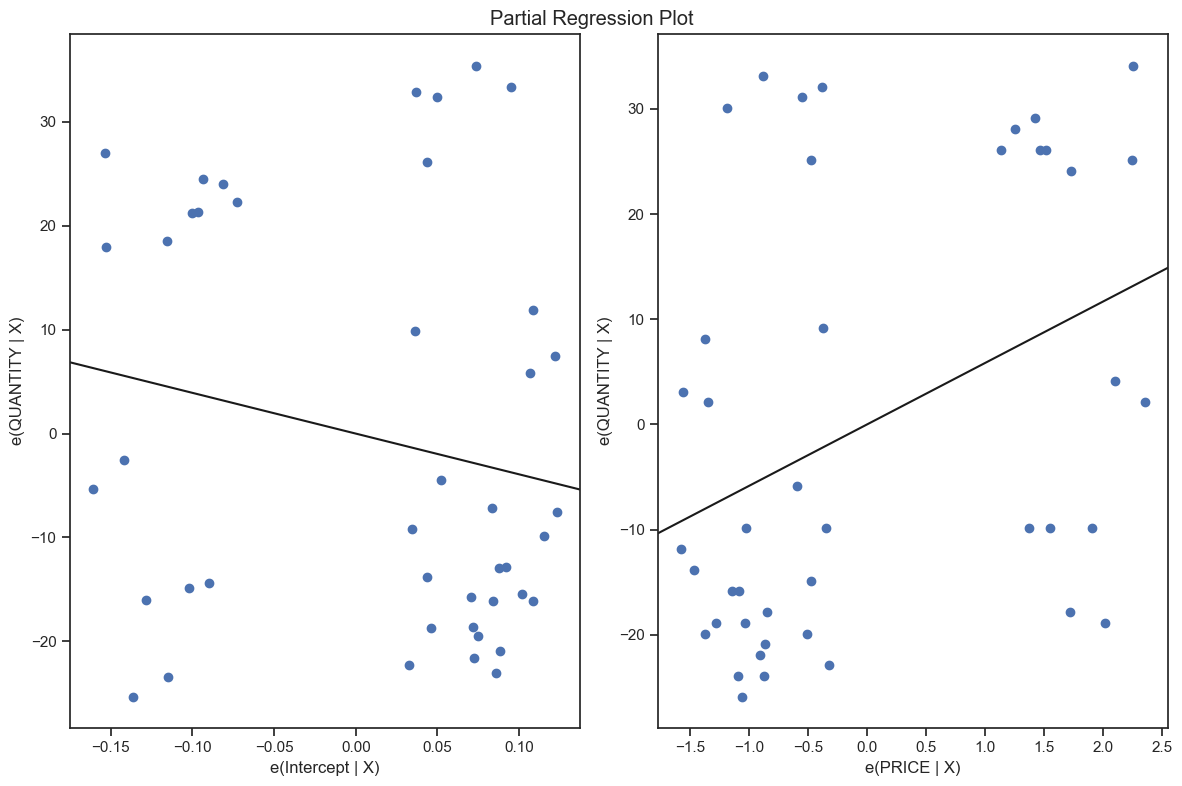

In [130]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_2042).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [131]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
569,2042,3,BURGER,2012-01-12,15.79,45,2012,No Holiday,0,0,16.2,0
570,2042,3,BURGER,2012-01-17,12.81,74,2012,No Holiday,0,0,15.9,0
571,2042,3,BURGER,2012-01-17,13.22,66,2012,No Holiday,0,0,15.9,0
573,2042,3,BURGER,2012-01-24,14.83,67,2012,No Holiday,0,0,20.1,1
575,2042,3,BURGER,2012-02-01,15.07,31,2012,No Holiday,0,0,23.9,1


In [132]:
burger.shape

(98, 12)

In [133]:
burger.describe()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,98.000000,98.000000,98,98.000000,98.000000,98.0,98.0,98.0,98.000000,98.000000
mean,2050.255102,1.795918,2012-02-20 22:17:08.571428608,13.420714,36.704082,2012.0,0.0,0.0,22.085714,0.714286
min,2042.000000,1.000000,2012-01-02 00:00:00,12.000000,13.000000,2012.0,0.0,0.0,15.300000,0.000000
25%,2042.000000,1.000000,2012-01-25 06:00:00,12.560000,20.250000,2012.0,0.0,0.0,17.900000,0.000000
50%,2049.000000,2.000000,2012-02-22 12:00:00,13.025000,29.000000,2012.0,0.0,0.0,22.700000,1.000000
75%,2049.000000,3.000000,2012-03-14 18:00:00,13.365000,49.750000,2012.0,0.0,0.0,25.200000,1.000000
max,2062.000000,3.000000,2012-04-06 00:00:00,16.080000,75.000000,2012.0,0.0,0.0,27.100000,1.000000
std,7.339079,0.849004,NaN,1.241546,19.667970,0.0,0.0,0.0,3.864883,0.454077


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

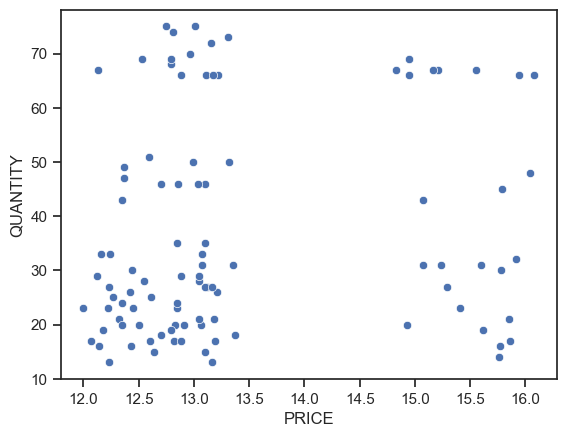

In [134]:
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

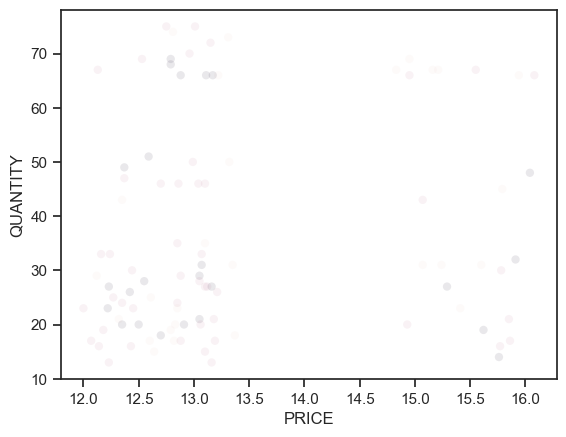

In [135]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [136]:
np.unique(bau_data.SELL_ID)

array([1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070,
       1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
       2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063])

In [137]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 1, 2, 3])

In [138]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

In [139]:
burger_2042 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 2042)]

In [140]:
burger_2042.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
567,2042,3,BURGER,2012-01-03,12.51,71,2012,No Holiday,0,1,14.3,0
568,2042,3,BURGER,2012-01-08,16.05,43,2012,No Holiday,1,0,12.9,0
569,2042,3,BURGER,2012-01-12,15.79,45,2012,No Holiday,0,0,16.2,0
570,2042,3,BURGER,2012-01-17,12.81,74,2012,No Holiday,0,0,15.9,0
571,2042,3,BURGER,2012-01-17,13.22,66,2012,No Holiday,0,0,15.9,0


In [141]:
burger_2042.describe()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,43.0,43.0,43,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000
mean,2042.0,3.0,2012-02-24 00:33:29.302325504,13.695581,40.883721,2012.0,0.232558,0.023256,22.167442,0.790698
min,2042.0,3.0,2012-01-03 00:00:00,12.120000,15.000000,2012.0,0.000000,0.000000,12.900000,0.000000
25%,2042.0,3.0,2012-02-06 12:00:00,12.625000,22.500000,2012.0,0.000000,0.000000,20.600000,1.000000
50%,2042.0,3.0,2012-02-29 00:00:00,13.190000,31.000000,2012.0,0.000000,0.000000,22.500000,1.000000
75%,2042.0,3.0,2012-03-13 00:00:00,15.140000,66.000000,2012.0,0.000000,0.000000,25.150000,1.000000
max,2042.0,3.0,2012-04-07 00:00:00,16.050000,75.000000,2012.0,1.000000,1.000000,27.100000,1.000000
std,0.0,0.0,NaN,1.341448,20.823761,0.0,0.427463,0.152499,3.596210,0.411625


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

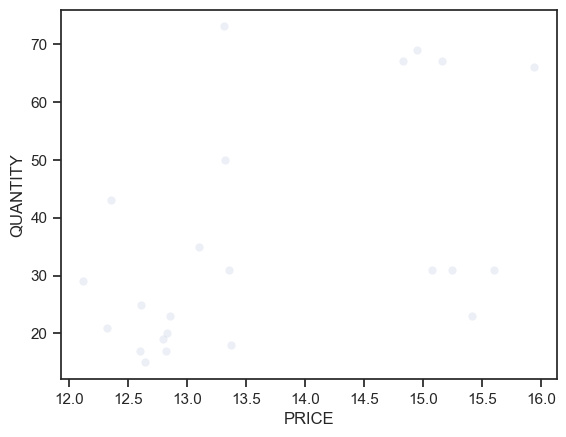

In [142]:
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

In [143]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2042).fit()
print(burger_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     6.778
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0128
Time:                        13:24:43   Log-Likelihood:                -187.77
No. Observations:                  43   AIC:                             379.5
Df Residuals:                      41   BIC:                             383.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.1929     30.901     -1.268      0.2

<Figure size 1200x800 with 0 Axes>

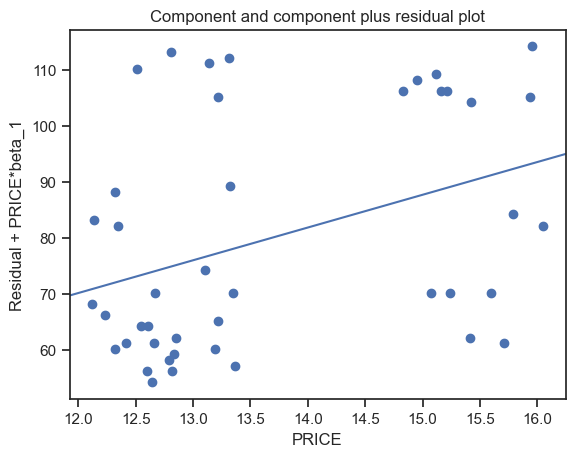

In [144]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

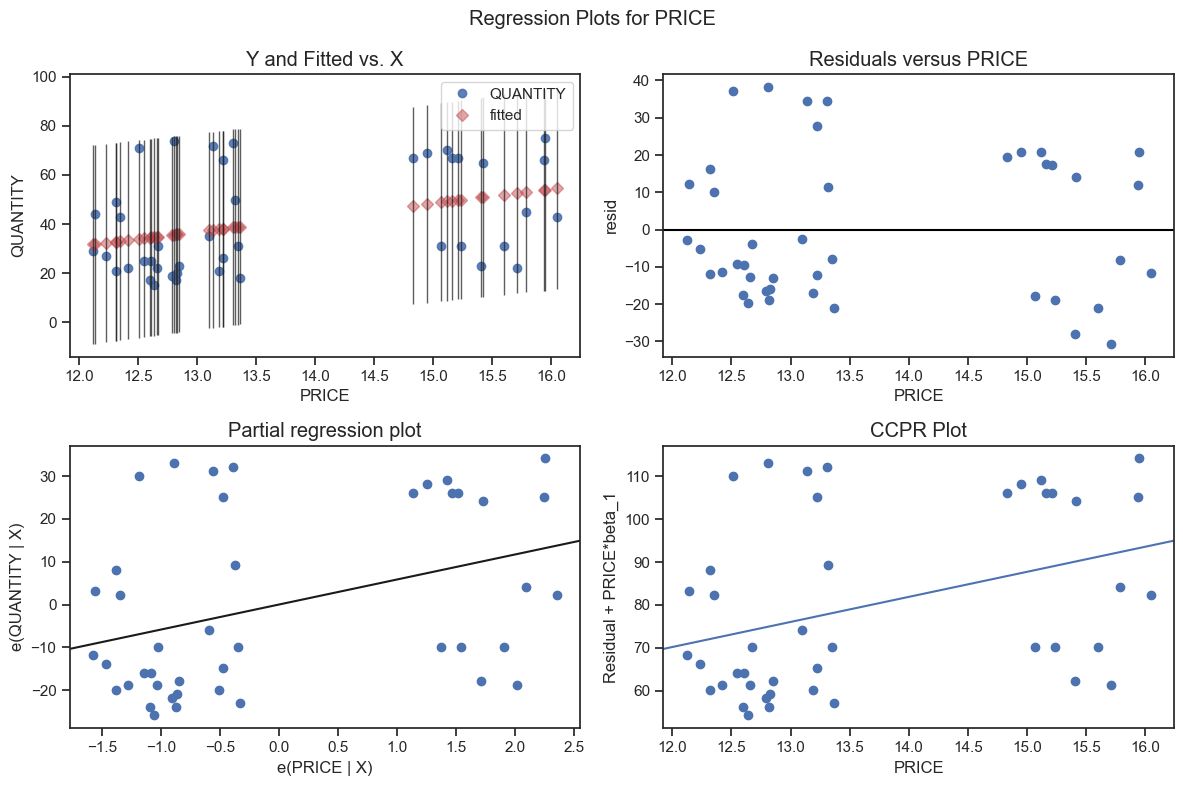

In [145]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

In [146]:
burger_2049 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2049)]

burger_2049.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
994,2049,1,BURGER,2012-01-01,13.00,50,2012,No Holiday,1,0,17.8,0
995,2049,1,BURGER,2012-01-02,12.35,24,2012,No Holiday,0,0,16.0,0
996,2049,1,BURGER,2012-01-02,12.70,46,2012,No Holiday,0,0,16.0,0
997,2049,1,BURGER,2012-01-02,12.88,29,2012,No Holiday,0,0,16.0,0
998,2049,1,BURGER,2012-01-02,13.07,33,2012,No Holiday,0,0,16.0,0


In [147]:
burger_2049.describe()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,76.0,76.0,76,76.000000,76.000000,76.0,76.00000,76.000000,76.000000,76.000000
mean,2049.0,1.0,2012-02-16 00:18:56.842105344,13.275132,36.500000,2012.0,0.25000,0.065789,21.053947,0.605263
min,2049.0,1.0,2012-01-01 00:00:00,12.000000,13.000000,2012.0,0.00000,0.000000,12.900000,0.000000
25%,2049.0,1.0,2012-01-18 18:00:00,12.537500,21.000000,2012.0,0.00000,0.000000,17.225000,0.000000
50%,2049.0,1.0,2012-02-14 00:00:00,12.995000,28.500000,2012.0,0.00000,0.000000,21.700000,1.000000
75%,2049.0,1.0,2012-03-14 06:00:00,13.172500,48.500000,2012.0,0.25000,0.000000,24.700000,1.000000
max,2049.0,1.0,2012-04-07 00:00:00,16.080000,75.000000,2012.0,1.00000,1.000000,27.100000,1.000000
std,0.0,0.0,NaN,1.157769,18.871142,0.0,0.43589,0.249561,4.033475,0.492042


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

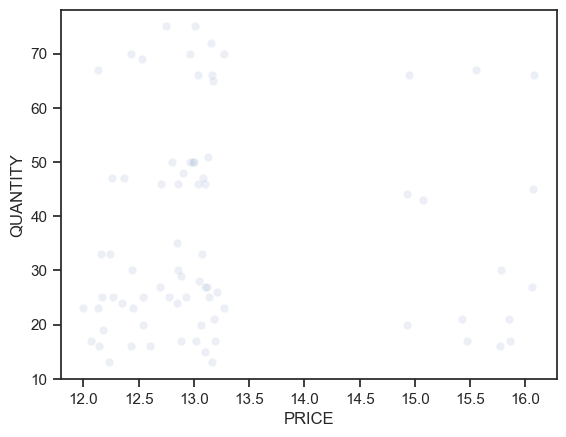

In [148]:
sns.scatterplot(data = burger_2049, x = burger_2049.PRICE, y = burger_2049.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.07126
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.790
Time:                        13:26:37   Log-Likelihood:                -330.56
No. Observations:                  76   AIC:                             665.1
Df Residuals:                      74   BIC:                             669.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7886     25.236      1.180      0.2

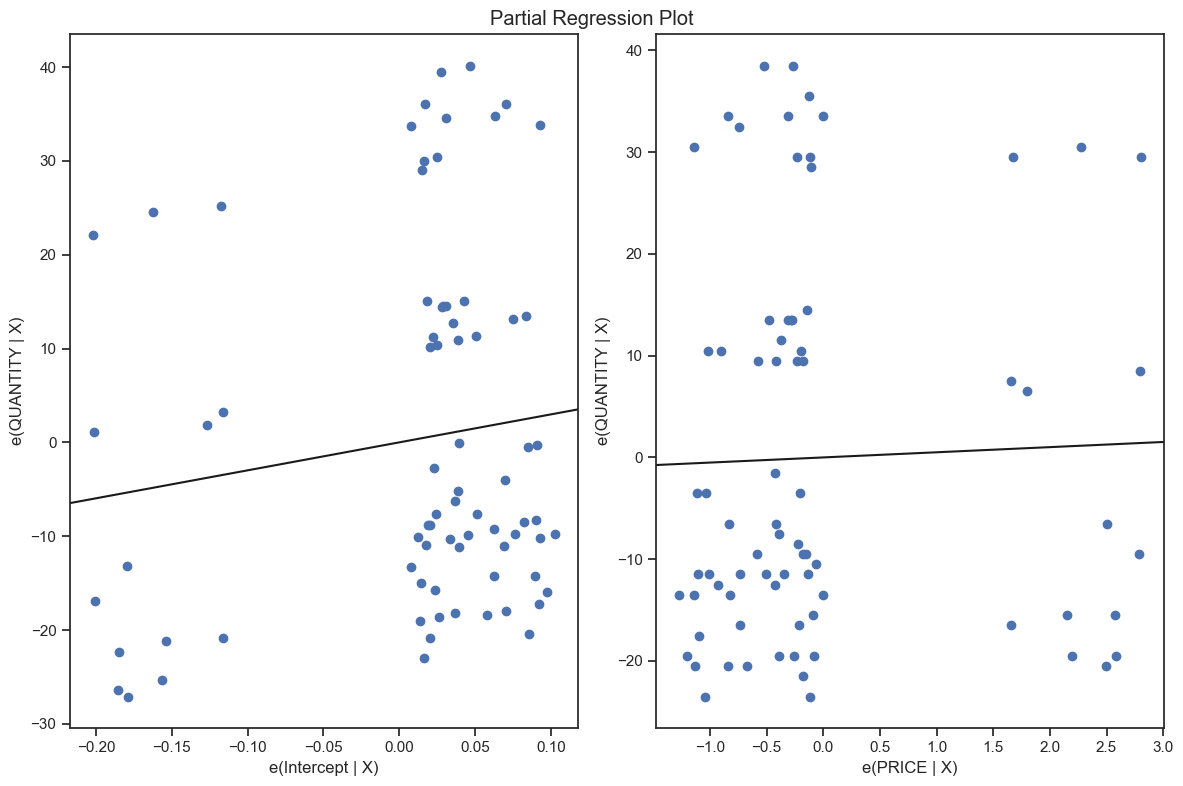

In [149]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2049).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

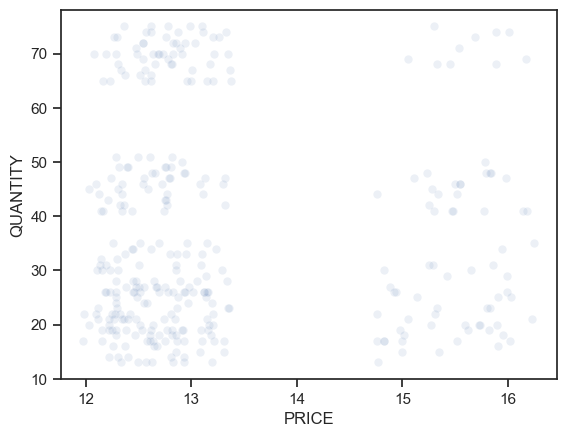

In [150]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()


In [152]:
coke.shape

(326, 12)

In [153]:
coke.describe()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,326.000000,326.000000,326,326.000000,326.000000,326.0,326.000000,326.000000,326.000000,326.000000
mean,1719.398773,0.794479,2012-02-17 20:54:28.711656448,13.311748,37.453988,2012.0,0.325153,0.098160,21.384663,0.656442
min,1067.000000,0.000000,2012-01-01 00:00:00,11.980000,13.000000,2012.0,0.000000,0.000000,12.900000,0.000000
25%,1076.750000,0.000000,2012-01-24 00:00:00,12.462500,21.000000,2012.0,0.000000,0.000000,17.900000,0.000000
50%,2047.000000,0.000000,2012-02-17 12:00:00,12.820000,30.000000,2012.0,0.000000,0.000000,21.800000,1.000000
75%,2053.000000,1.000000,2012-03-11 18:00:00,13.320000,48.000000,2012.0,1.000000,0.000000,24.900000,1.000000
max,2057.000000,3.000000,2012-04-09 00:00:00,16.250000,75.000000,2012.0,1.000000,1.000000,30.700000,1.000000
std,464.719979,1.060087,NaN,1.245389,19.555586,0.0,0.469152,0.297988,3.971926,0.475626


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

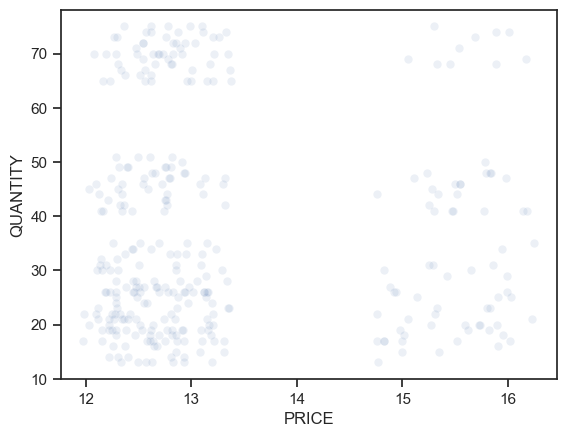

In [154]:
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1055
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.746
Time:                        13:27:07   Log-Likelihood:                -1431.3
No. Observations:                 326   AIC:                             2867.
Df Residuals:                     324   BIC:                             2874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2256     11.661      3.535      0.0

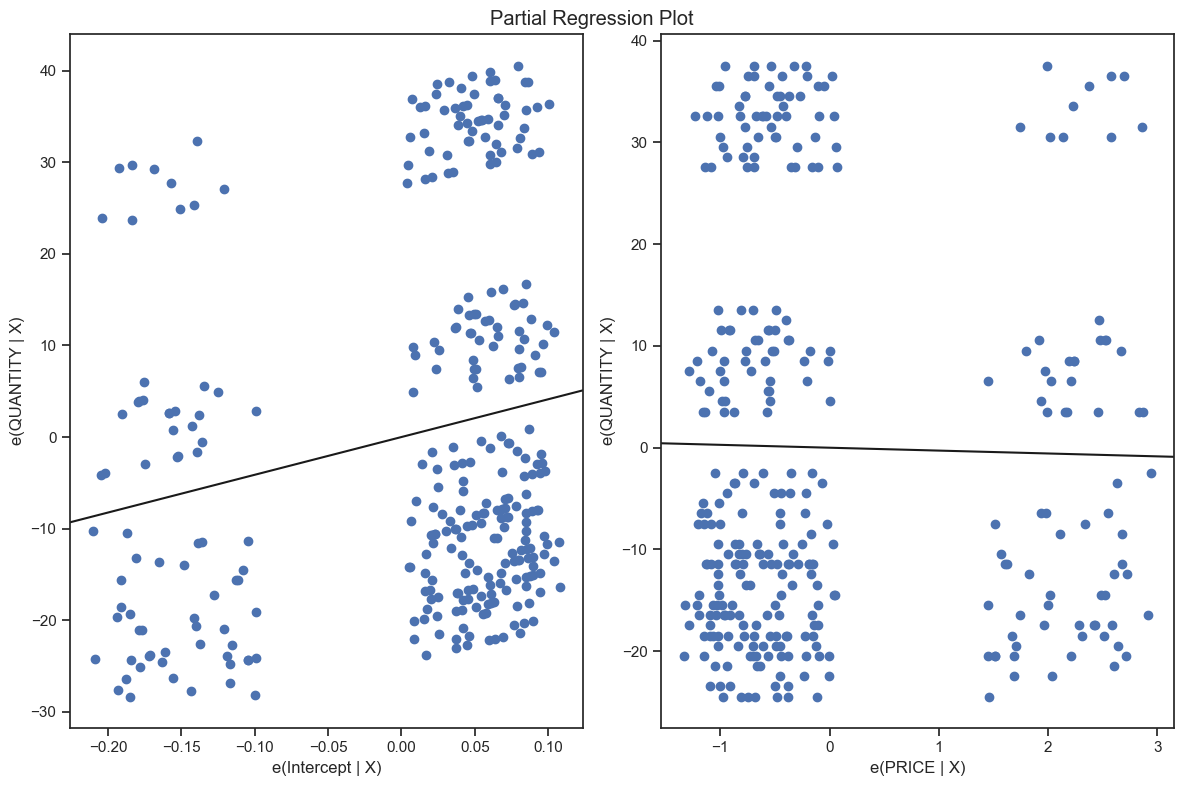

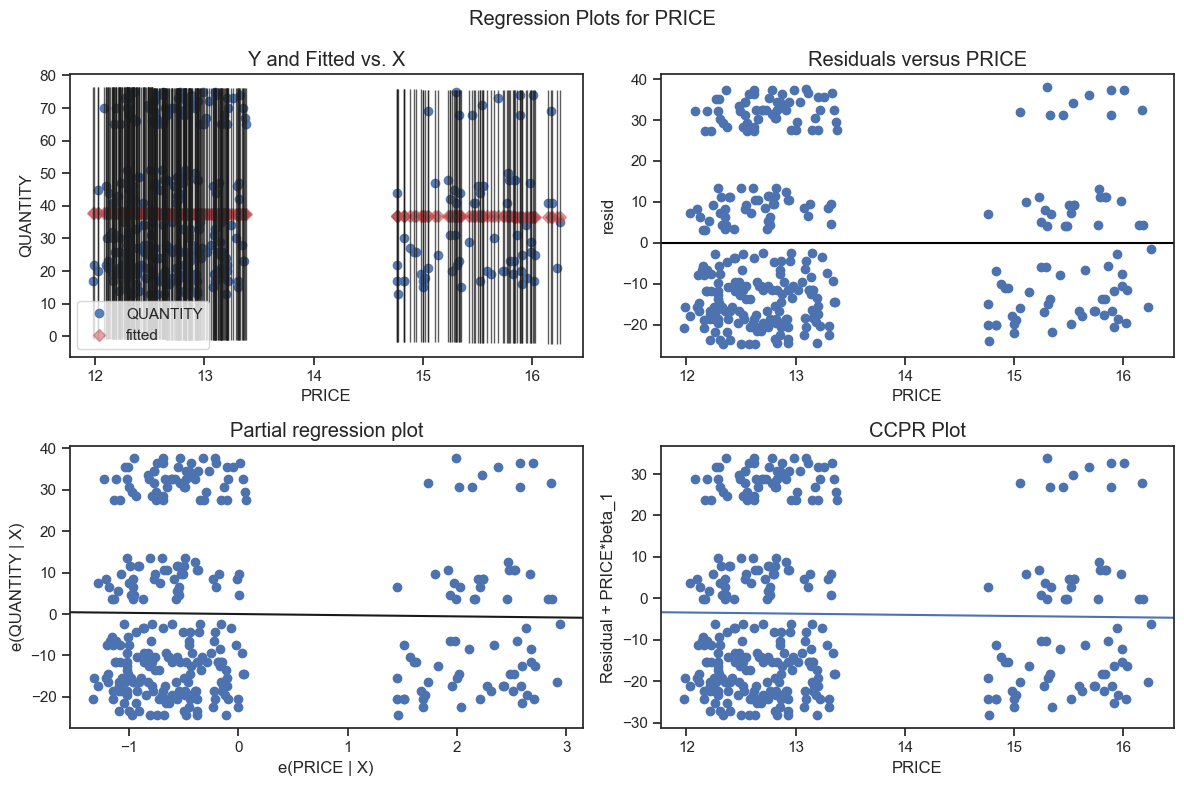

In [151]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

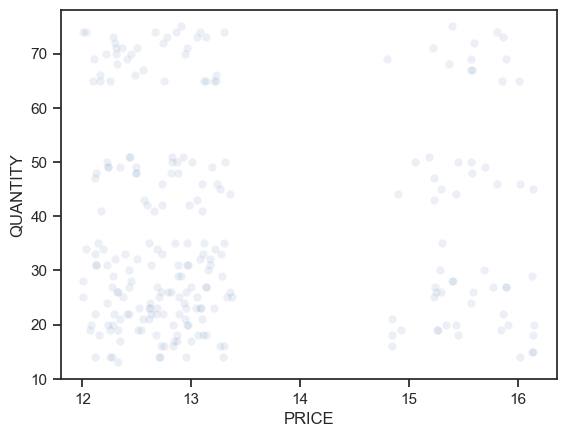

In [155]:
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.07242
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.788
Time:                        13:33:03   Log-Likelihood:                -1056.3
No. Observations:                 242   AIC:                             2117.
Df Residuals:                     240   BIC:                             2124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2586     12.917      2.652      0.0

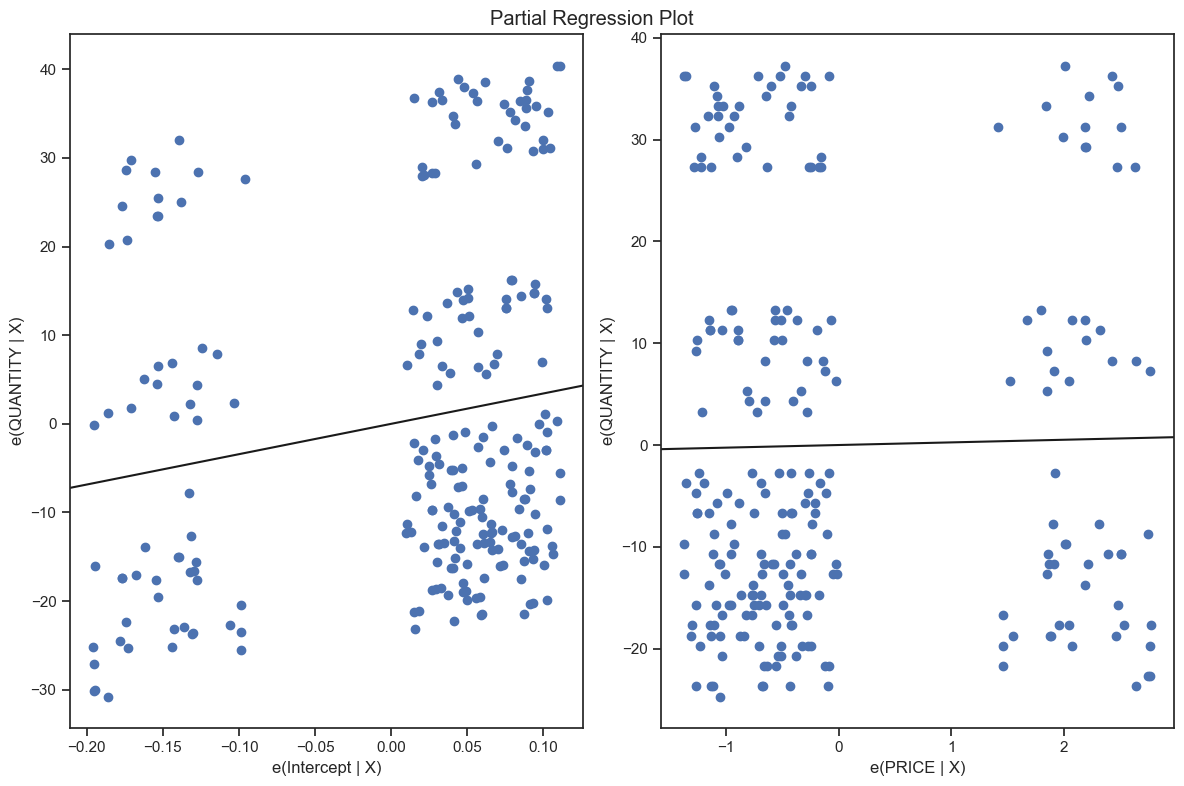

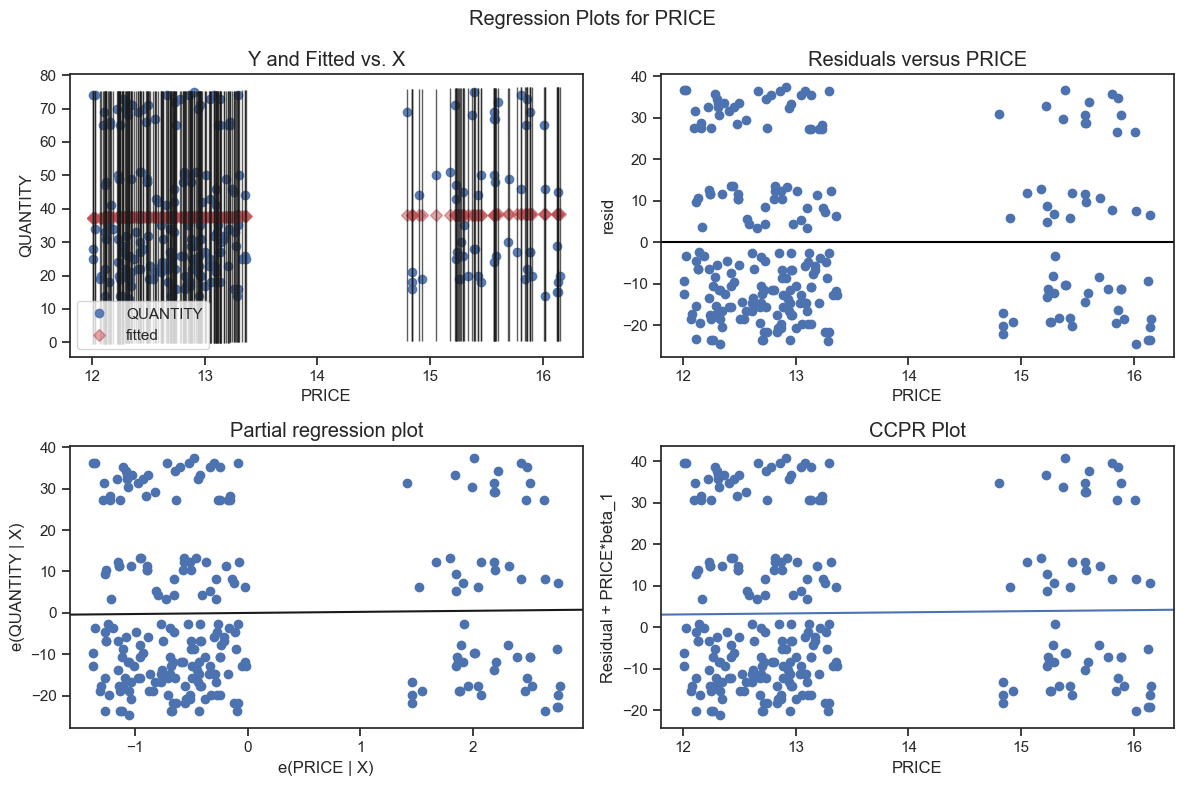

In [156]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

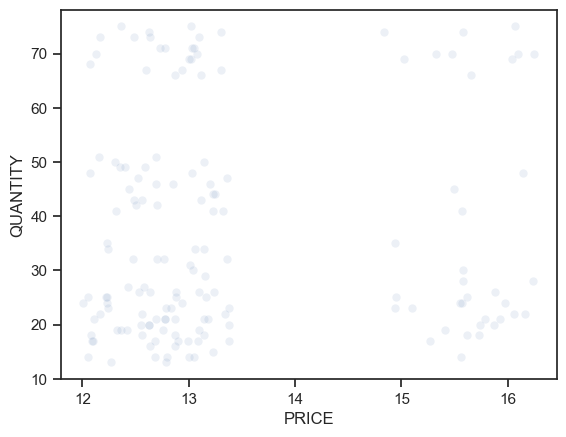

In [157]:
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3461
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.557
Time:                        13:33:38   Log-Likelihood:                -675.79
No. Observations:                 153   AIC:                             1356.
Df Residuals:                     151   BIC:                             1362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.6867     17.119      1.559      0.1

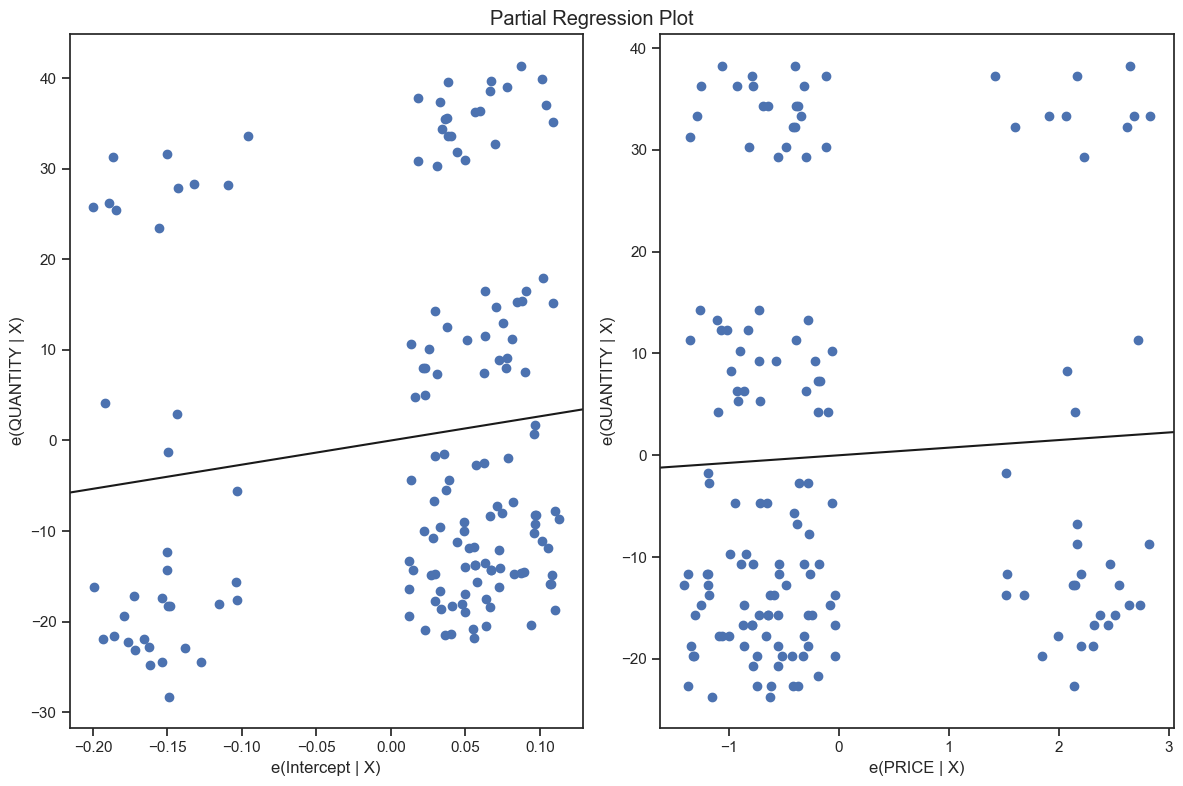

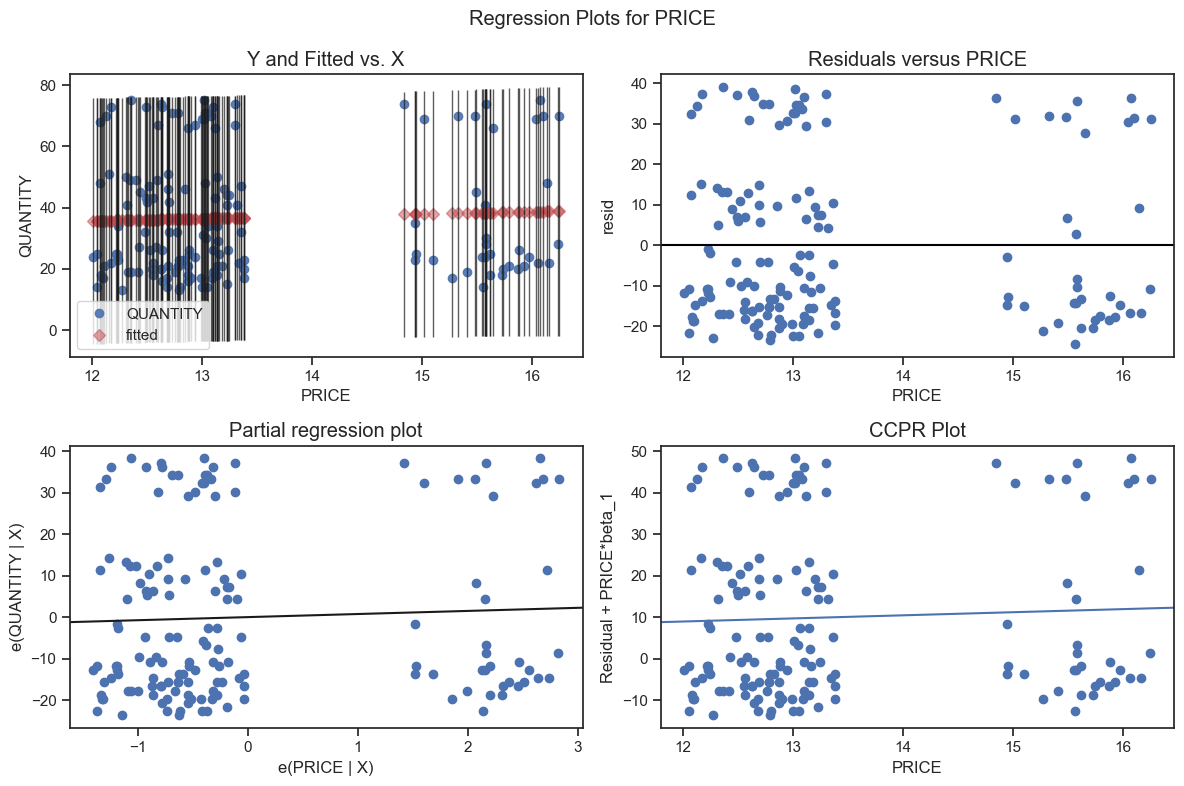

In [158]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [159]:
elasticities = {}

In [ ]:
    def create_model_and_find_elasticity(data):
        model = ols("QUANTITY ~ PRICE", data).fit()
        price_elasticity = model.params[1]
        print("Price elasticity of the product: " + str(price_elasticity))
        print(model.summary())
        fig = plt.figure(figsize=(12,8))
        fig = sm.graphics.plot_partregress_grid(model, fig=fig)
        return price_elasticity, model

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]


Price elasticity of the product: 5.84689174184825
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     6.778
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0128
Time:                        13:34:48   Log-Likelihood:                -187.77
No. Observations:                  43   AIC:                             379.5
Df Residuals:                      41   BIC:                             383.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

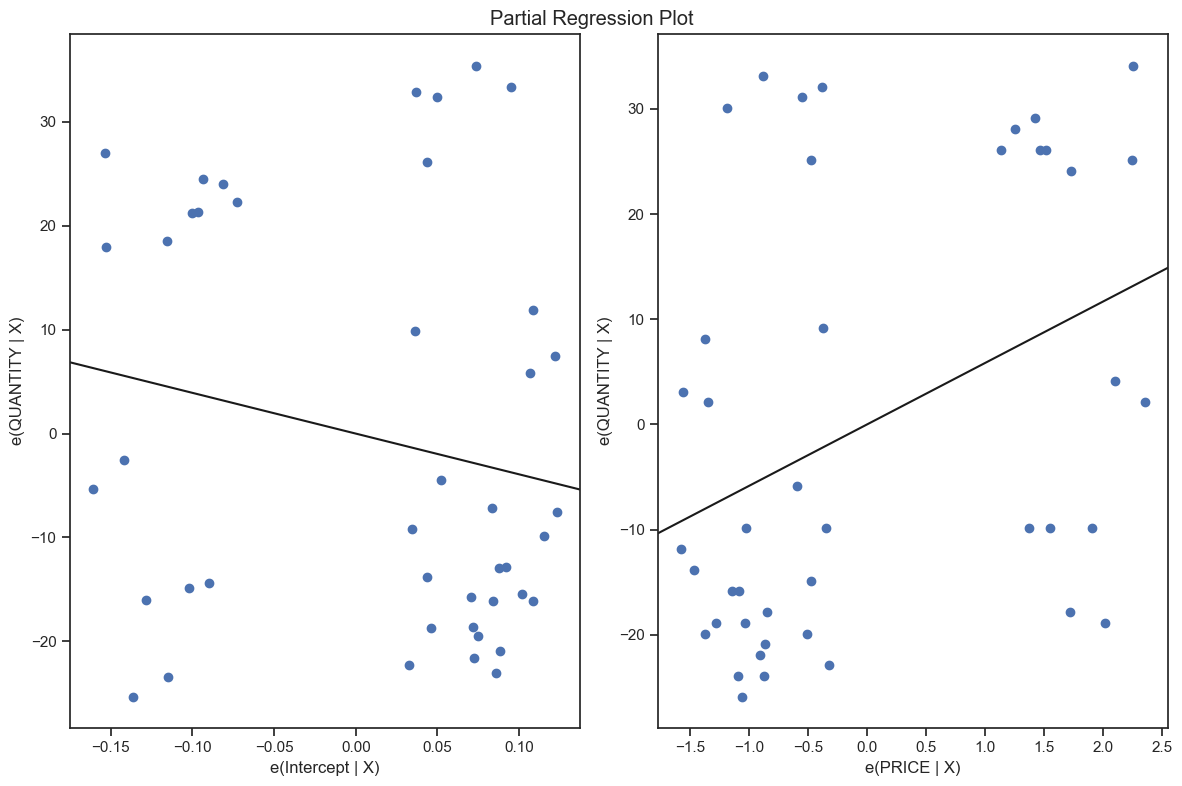

In [161]:
price_elasticity, model_burger_2042 = create_model_and_find_elasticity(burger_2042)
elasticities['burger_2042'] = price_elasticity

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]


Price elasticity of the product: 2.979615532463279
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8340
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.369
Time:                        13:35:32   Log-Likelihood:                -129.20
No. Observations:                  29   AIC:                             262.4
Df Residuals:                      27   BIC:                             265.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

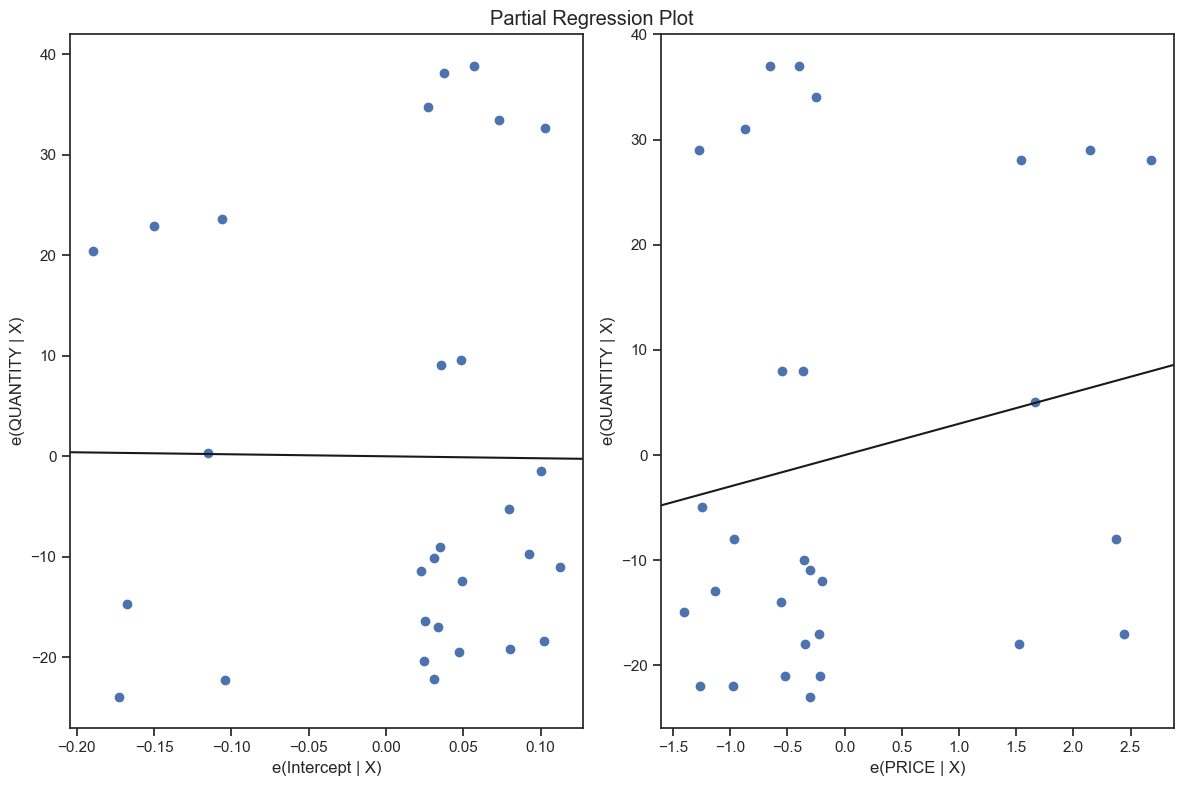

In [163]:
burger2049_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2049)]
elasticities['burger_2049'], model_burger_1071 = create_model_and_find_elasticity(burger2049_data)

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: -1.8021758286450145
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.3601
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.557
Time:                        13:36:52   Log-Likelihood:                -76.376
No. Observations:                  18   AIC:                             156.8
Df Residuals:                      16   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

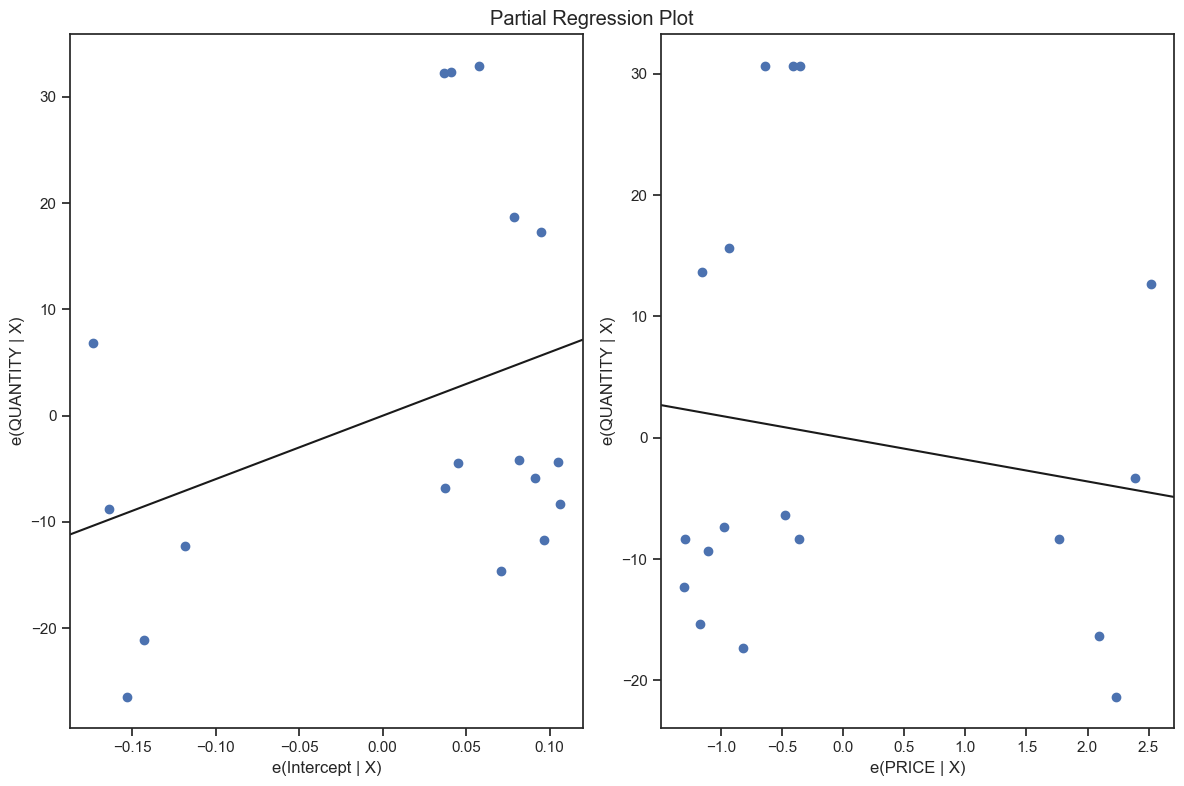

In [164]:
burger2062_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2062)]
elasticities['burger_2062'], model_burger_2062 = create_model_and_find_elasticity(burger2062_data)

Price elasticity of the product: 1.5899486998886754
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.125
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.291
Time:                        13:37:10   Log-Likelihood:                -520.93
No. Observations:                 119   AIC:                             1046.
Df Residuals:                     117   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]


(np.float64(1.5899486998886754),
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2c7f7de83b0>)

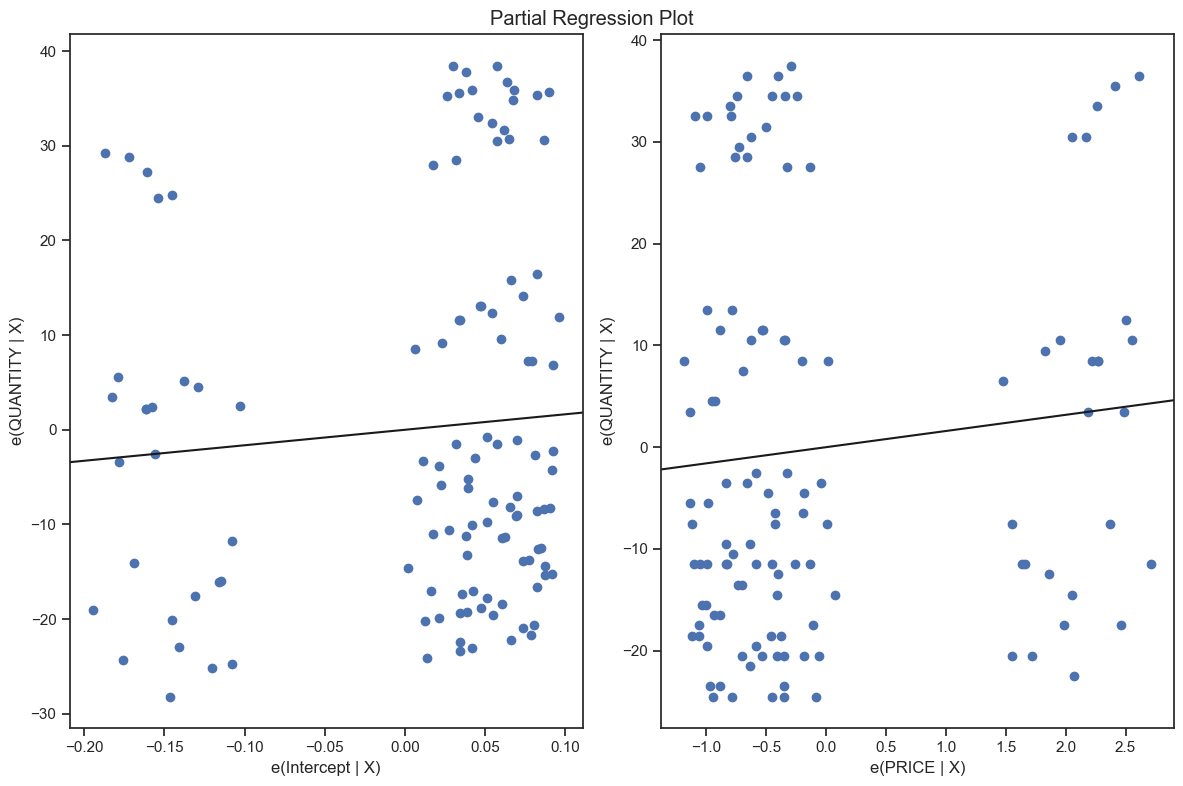

In [165]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

In [179]:
coke_sellers = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]['SELL_ID'].unique()
print("Available SELL_IDs for COKE:", coke_sellers)

Available SELL_IDs for COKE: [1067 1071 1076 1079 2047 2053 2057]


C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Price elasticity of the product: -3.2128615415678023
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.188
Method:                 Least Squares   F-statistic:                    0.2102
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.670
Time:                        13:47:45   Log-Likelihood:                -26.405
No. Observations:                   6   AIC:                             56.81
Df Residuals:                       4   BIC:                             56.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

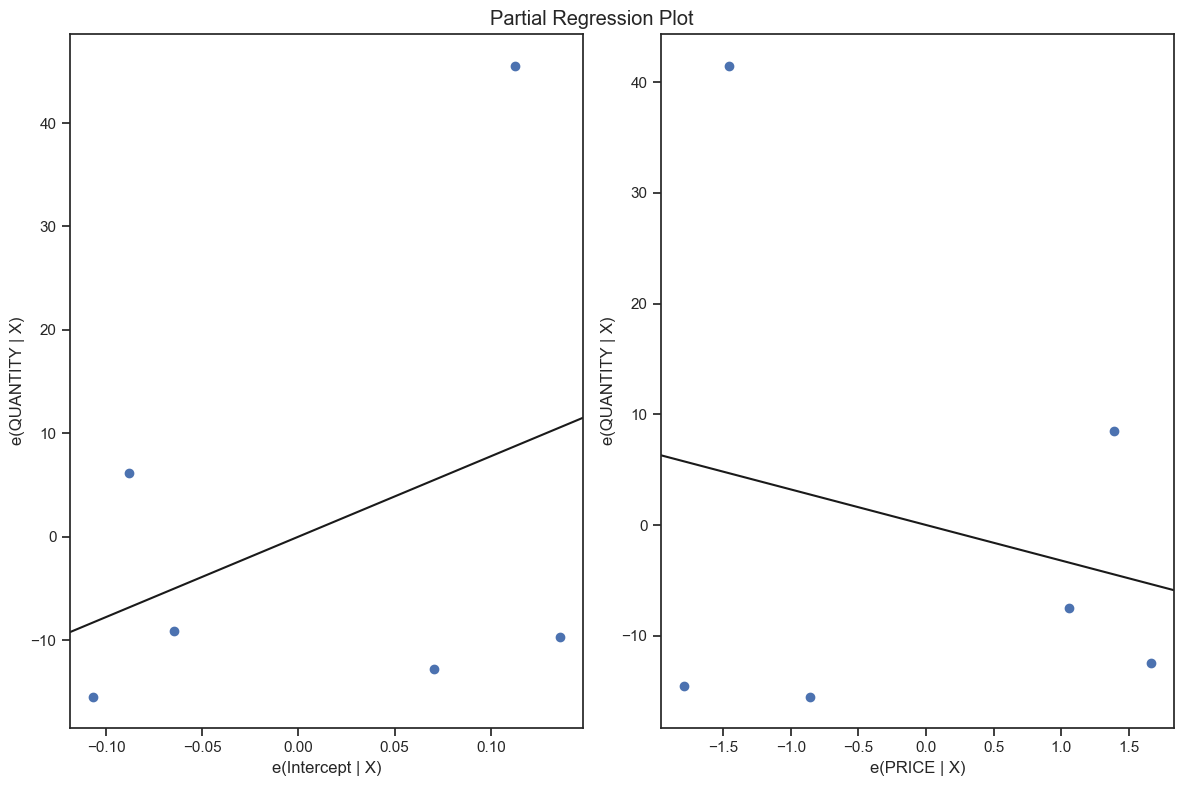

In [180]:
coke_data_1067 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 1067)]
elasticities['coke_1067'], model_coke_1067 = create_model_and_find_elasticity(coke_data_1067)

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: 3.9535211811065363
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.6021
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.454
Time:                        13:49:17   Log-Likelihood:                -55.079
No. Observations:                  13   AIC:                             114.2
Df Residuals:                      11   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


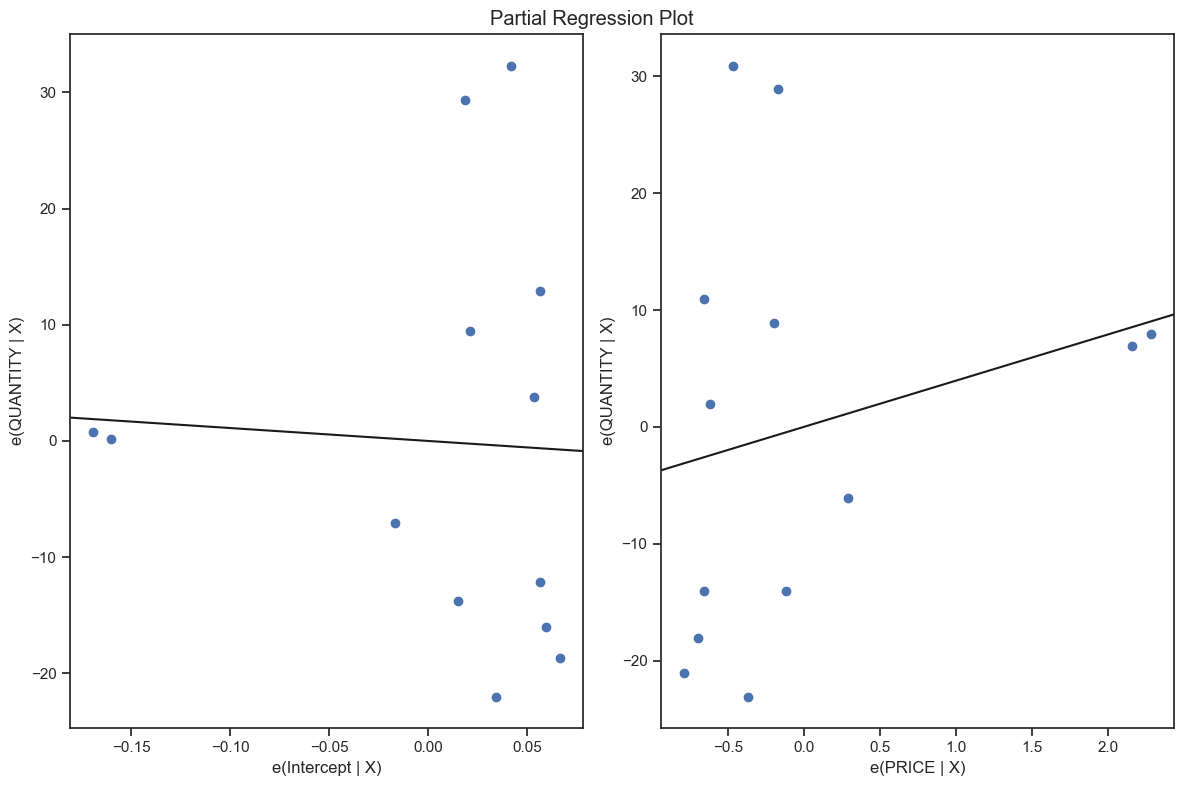

In [181]:
coke_data_1071 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 1071)]
elasticities['coke_1071'], model_coke_1071 = create_model_and_find_elasticity(coke_data_1071)

In [182]:
lemonade_sellers = bau2_data[bau2_data['ITEM_NAME'] == "LEMONADE"]['SELL_ID'].unique()
print("Available SELL_IDs for LEMONADE:", lemonade_sellers)

Available SELL_IDs for LEMONADE: [1060 1061 1063 1075 2048]


C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Price elasticity of the product: -3.2460991792971097
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                    0.4140
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.548
Time:                        13:50:28   Log-Likelihood:                -29.274
No. Observations:                   7   AIC:                             62.55
Df Residuals:                       5   BIC:                             62.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

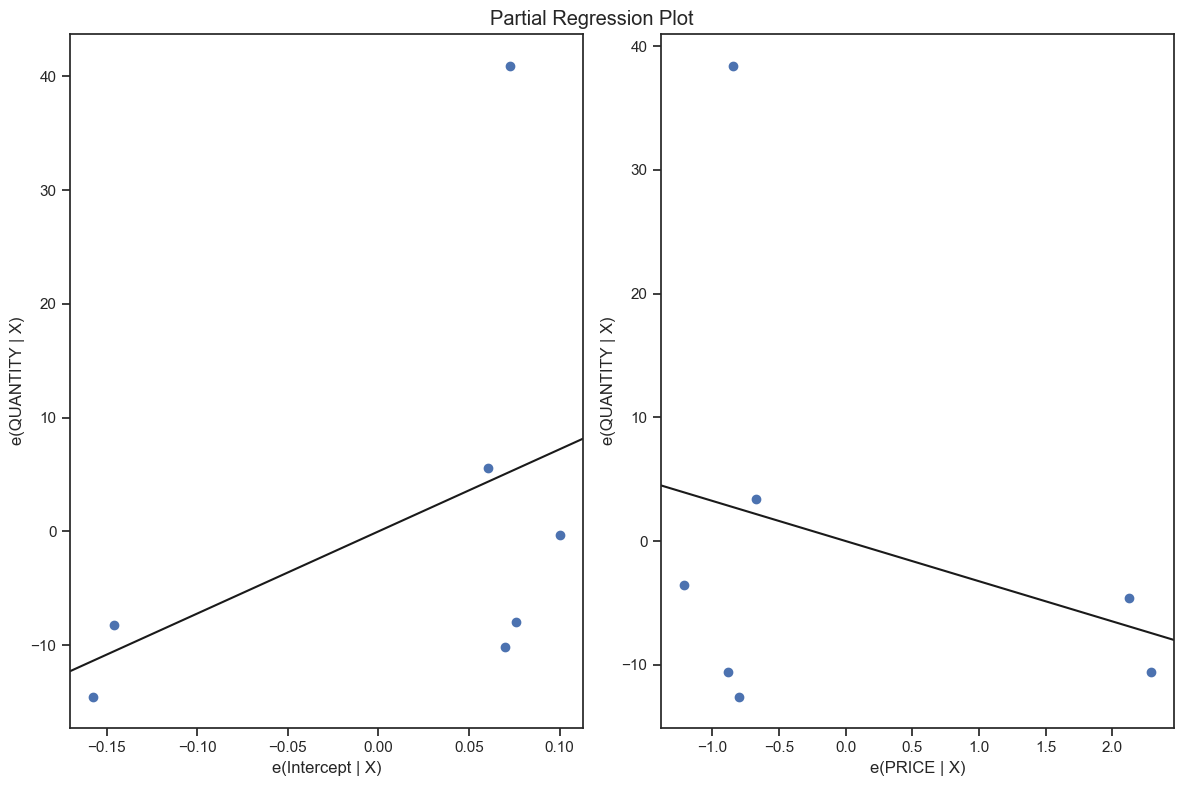

In [183]:
lemonade_data_1060 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 1060)]
elasticities['lemonade_1060'], model_lemonade_1060 = create_model_and_find_elasticity(lemonade_data_1060)

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: -3.2389826637156176
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.6313
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.447
Time:                        13:51:02   Log-Likelihood:                -44.322
No. Observations:                  11   AIC:                             92.64
Df Residuals:                       9   BIC:                             93.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

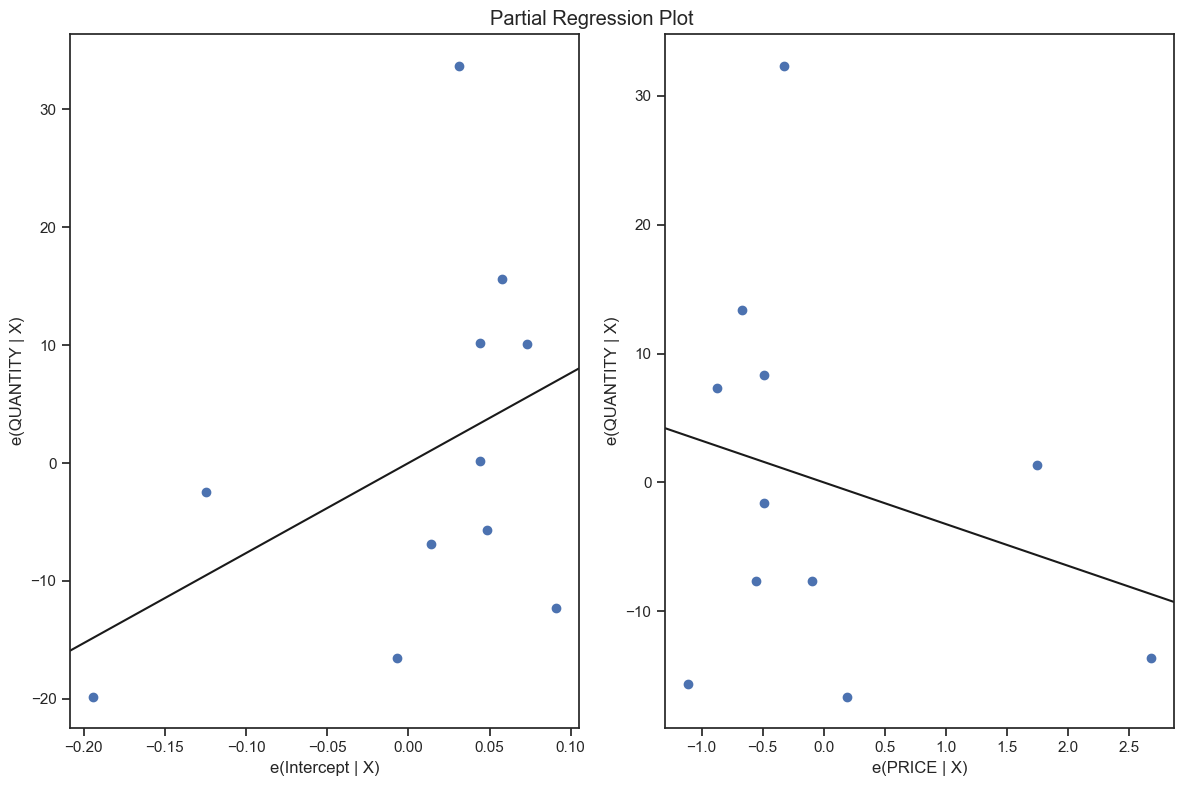

In [184]:
lemonade_data_1063 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 1063)]
elasticities['lemonade_1063'], model_lemonade_1063 = create_model_and_find_elasticity(lemonade_data_1063)

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: 3.003412093417147
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.3810
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.552
Time:                        13:52:36   Log-Likelihood:                -47.494
No. Observations:                  11   AIC:                             98.99
Df Residuals:                       9   BIC:                             99.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

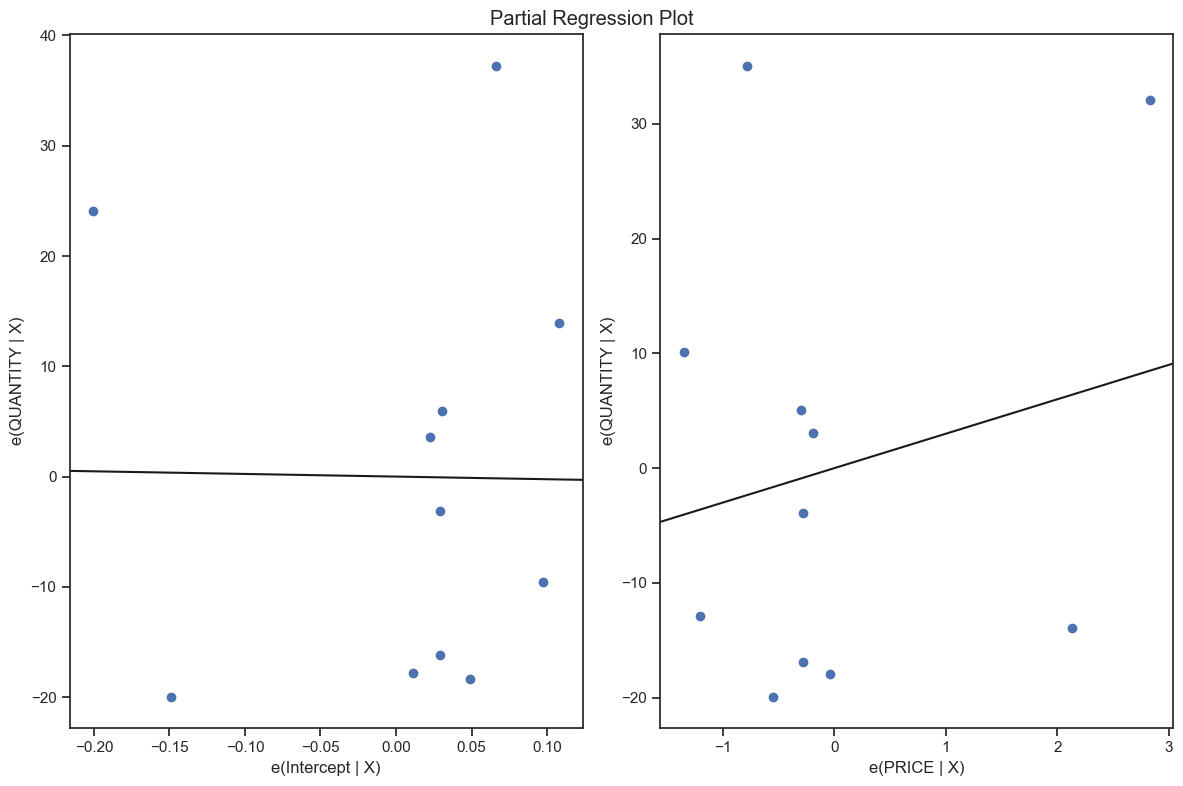

In [185]:
lemonade_data_1075 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 1075)]
elasticities['lemonade_1075'], model_lemonade_1075 = create_model_and_find_elasticity(lemonade_data_1075)

In [186]:
coffee_sellers = bau2_data[bau2_data['ITEM_NAME'] == "COFFEE"]['SELL_ID'].unique()
print("Available SELL_IDs for COFFEE:", coffee_sellers)

Available SELL_IDs for COFFEE: [2041 2043 2046 2055]


C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: -7.91393803108712
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3.294
Date:                Sun, 24 Aug 2025   Prob (F-statistic):             0.0969
Time:                        13:53:52   Log-Likelihood:                -55.806
No. Observations:                  13   AIC:                             115.6
Df Residuals:                      11   BIC:                             116.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

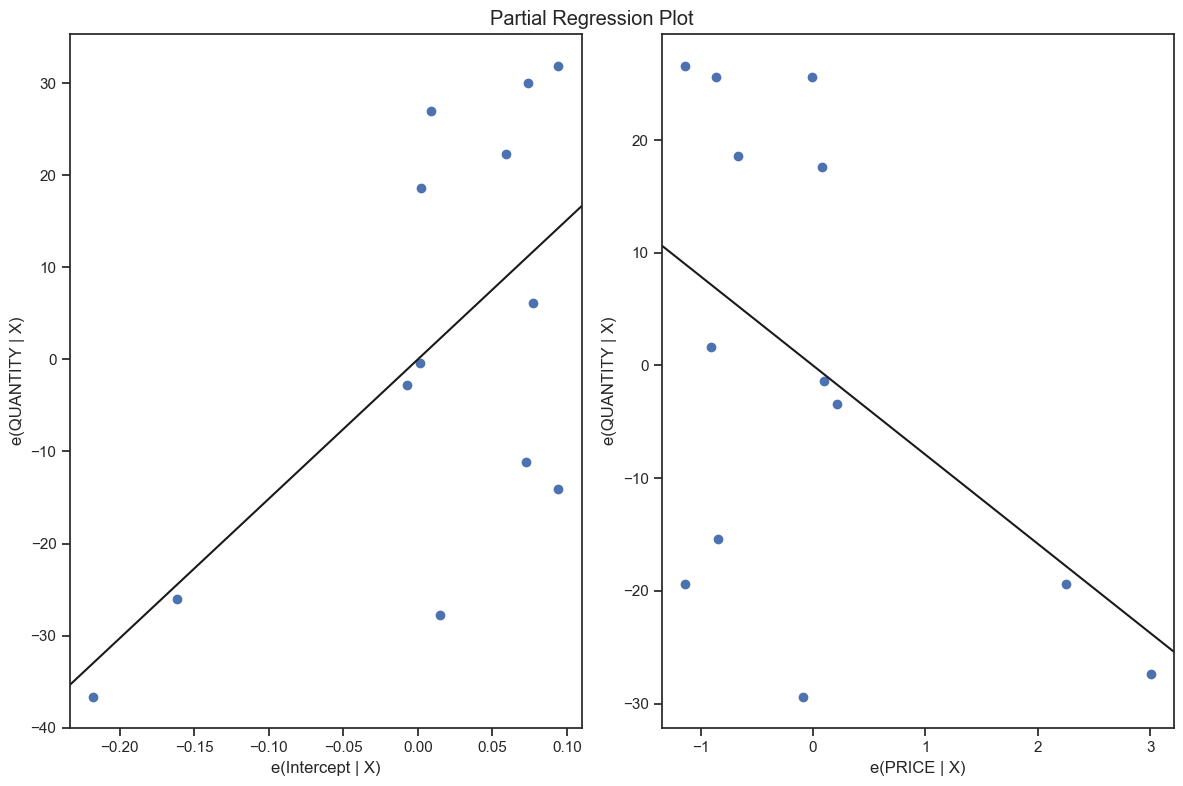

In [187]:
coffee_data_2041 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2041)]
elasticities['coffee_2041'], model_coffee_2041 = create_model_and_find_elasticity(coffee_data_2041)

C:\Users\Nehil\AppData\Local\Temp\ipykernel_23320\3633678012.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_elasticity = model.params[1]
C:\Users\Nehil\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


Price elasticity of the product: 0.7120533738611914
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                   0.04497
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.835
Time:                        13:54:23   Log-Likelihood:                -76.130
No. Observations:                  18   AIC:                             156.3
Df Residuals:                      16   BIC:                             158.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


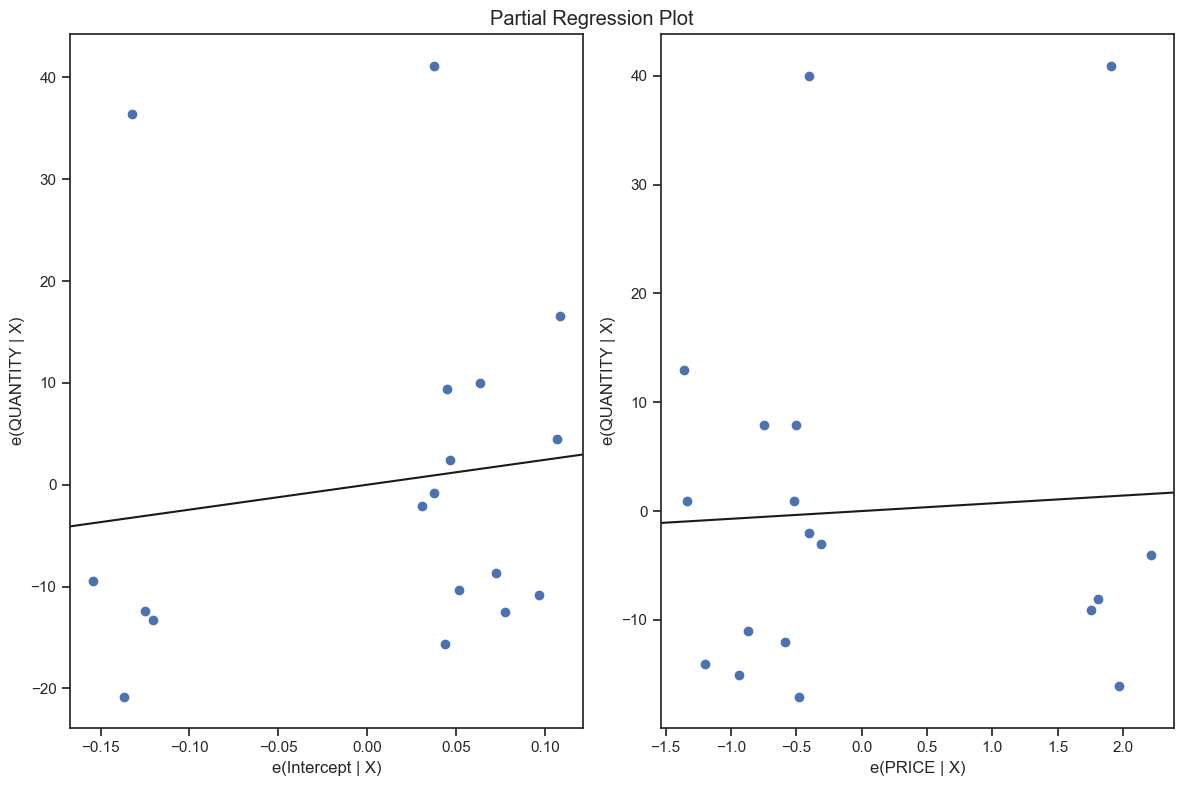

In [188]:
coffee_data_2043 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2043)]
elasticities['coffee_2043'], model_coffee_2043 = create_model_and_find_elasticity(coffee_data_2043)

<h1>List in a table the items and their price elasticities</h1>

In [189]:
elasticities

{'burger_2042': np.float64(5.84689174184825),
 'burger_2049': np.float64(2.979615532463279),
 'burger_2062': np.float64(-1.8021758286450145),
 'coke_1067': np.float64(-3.2128615415678023),
 'coke_1071': np.float64(3.9535211811065363),
 'lemonade_1060': np.float64(-3.2460991792971097),
 'lemonade_1063': np.float64(-3.2389826637156176),
 'lemonade_1075': np.float64(3.003412093417147),
 'coffee_2041': np.float64(-7.91393803108712),
 'coffee_2043': np.float64(0.7120533738611914)}

<h1>Find optimal price for maximum profit</h1>

<p>Now, let's take coke (the sell_id was 1067 for the last coke data) and since we do not the buying price of coke, let''s assume it to be a little less than the minimum coke price in the dataset</p>

In [190]:
coke_data = coke_data_1067

In [191]:
coke_data.PRICE.min()

np.float64(12.29)

In [192]:
coke_data.PRICE.max()

np.float64(15.74)

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price.

In [193]:
buying_price_coke = 10

<p>Let's see the profit for various price points:</p>

In [194]:
start_price = 10.5
end_price = 20

In [195]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [196]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [198]:
test['QUANTITY'] = model_coke_1067.predict(test['PRICE'])

In [199]:
test

,PRICE,QUANTITY
0,10.50,44.002044
1,10.51,43.969916
2,10.52,43.937787
3,10.53,43.905658
4,10.54,43.873530
...,...,...
945,19.95,13.640503
946,19.96,13.608374
947,19.97,13.576246
948,19.98,13.544117


In [202]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

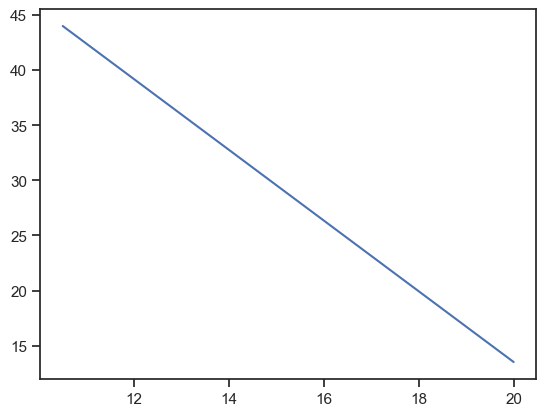

In [203]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.show()

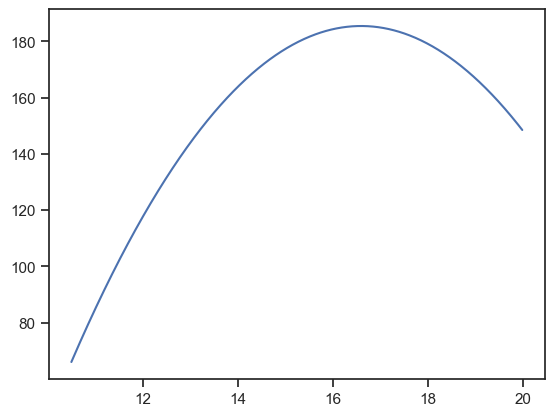

In [204]:
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

<p>Let's find the exact price at which maximum profit is gained:</p>

In [205]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [206]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
610,16.6,24.403589,185.467276


In [207]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

<h1>
Calculate the optimal price for all and list in table
</h1>

In [208]:
optimal_price = {}
buying_price = 9

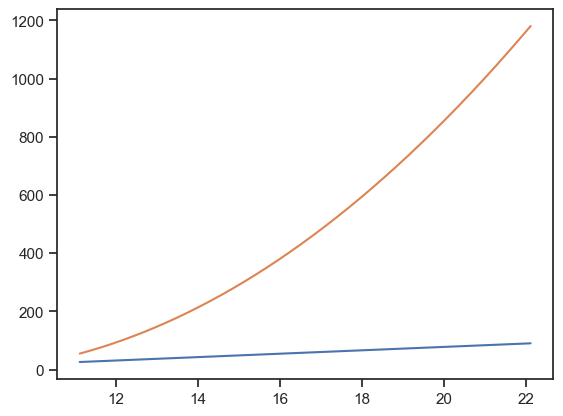

In [209]:
optimal_price['burger_2042'] = find_optimal_price(burger_2042, model_burger_2042, buying_price)

In [210]:
optimal_price

{'burger_2042':       PRICE   QUANTITY       PROFIT
 1099  22.11  90.081916  1180.973913}

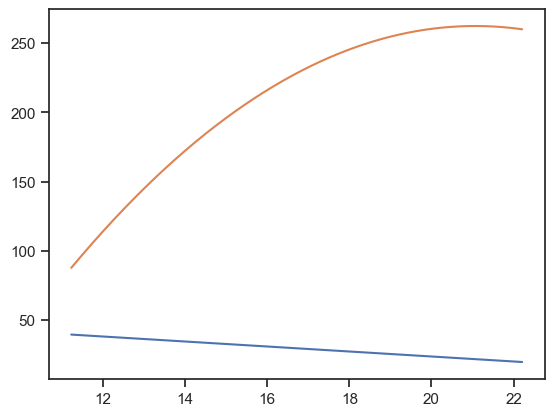

In [212]:
optimal_price['burger_2062'] = find_optimal_price(burger2062_data, model_burger_2062, buying_price)

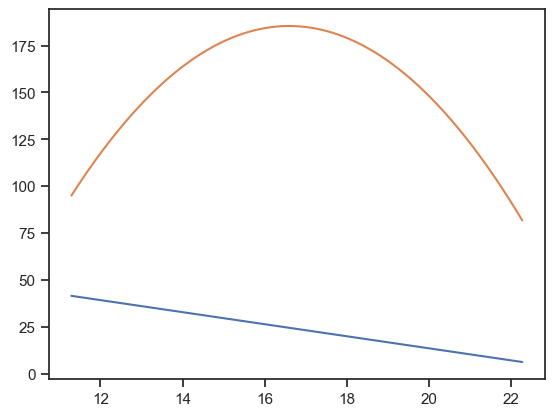

In [214]:
optimal_price['coke_1067'] = find_optimal_price(coke_data_1067, model_coke_1067, buying_price)

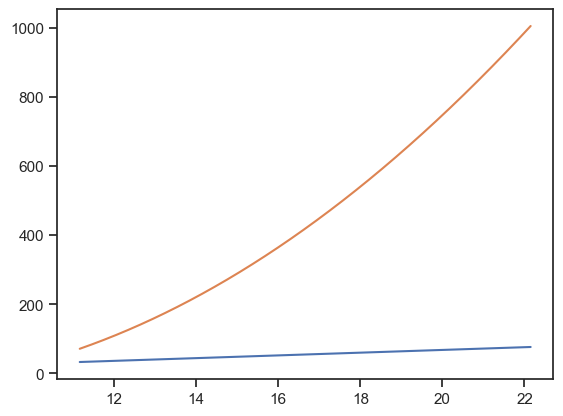

In [216]:
optimal_price['coke_1071'] = find_optimal_price(coke_data_1071, model_coke_1071, buying_price)

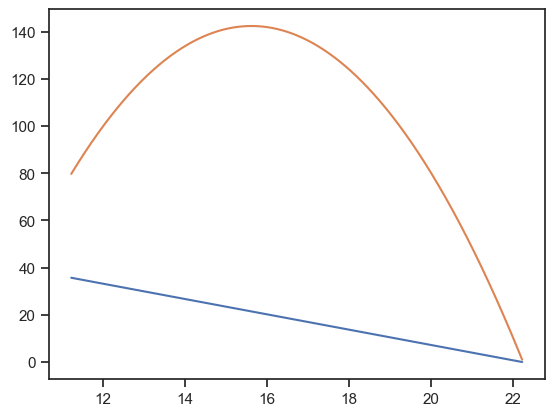

In [217]:
optimal_price['lemonade_1060'] = find_optimal_price(lemonade_data_1060, model_lemonade_1060, buying_price)

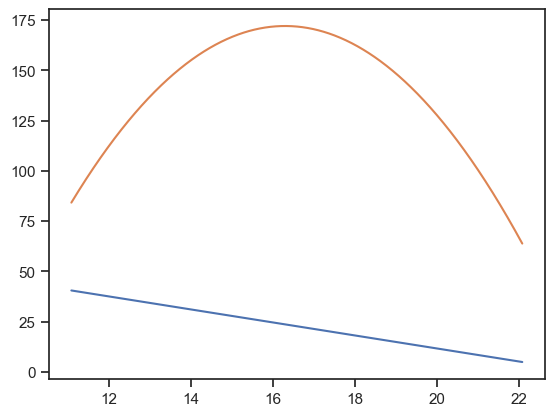

In [218]:
optimal_price['lemonade_1063'] = find_optimal_price(lemonade_data_1063, model_lemonade_1063, buying_price)

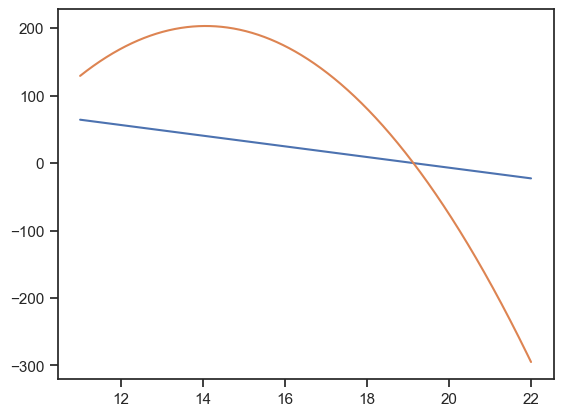

In [219]:
optimal_price['coffee_2041'] = find_optimal_price(coffee_data_2041, model_coffee_2041, buying_price)

In [220]:
optimal_price

{'burger_2042':       PRICE   QUANTITY       PROFIT
 1099  22.11  90.081916  1180.973913,
 'burger_2062':      PRICE   QUANTITY      PROFIT
 984  21.06  21.750935  262.316274,
 'coke_1067':      PRICE   QUANTITY      PROFIT
 531   16.6  24.403589  185.467276,
 'coke_1071':       PRICE   QUANTITY       PROFIT
 1099  22.15  76.458441  1005.428505,
 'lemonade_1060':      PRICE   QUANTITY     PROFIT
 439  15.62  21.504207  142.35785,
 'lemonade_1063':      PRICE   QUANTITY      PROFIT
 521  16.29  23.604351  172.075719,
 'coffee_2041':      PRICE   QUANTITY      PROFIT
 306  14.07  40.073354  203.171906}

In [222]:
coke_data_1071.PRICE.describe()

count    13.000000
mean     12.947692
std       1.031133
min      12.160000
25%      12.290000
50%      12.580000
75%      12.830000
max      15.230000
Name: PRICE, dtype: float64

<h1>Conclusion</h1>
<p>This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a rpoduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.
</p>